<a href="https://colab.research.google.com/github/andssuu/Monclass/blob/main/notebooks/cnns_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [ ]:
!pip install --user tensorflow-addons
# restart runtime
import os
os.kill(os.getpid(), 9)

     |████████████████████████████████| 1.1 MB 11.3 MB/s 


In [1]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
plt.style.use('default')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn import metrics

import tensorflow_addons as tfa

from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Reshape, BatchNormalization, Dropout, LayerNormalization, Activation, Input, ReLU, Add, DepthwiseConv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from tensorflow.keras import initializers
from tensorflow import Tensor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.initializers import glorot_uniform

# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from collections import Counter

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Leitura dos dados

In [3]:
!git clone https://github.com/andssuu/Monclass.git

Cloning into 'Monclass'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 1), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [4]:
df = pd.read_csv("Monclass/data/dataset_6.csv", float_precision='high')
df_data = df.loc[:, ['acc_x', 'acc_y', 'acc_z', 'gir_x', 'gir_y', 'gir_z', 'mag_x', 'mag_y', 'mag_z', 'displacement_speed', 'label']]
df_data

,acc_x,acc_y,acc_z,gir_x,gir_y,gir_z,mag_x,mag_y,mag_z,displacement_speed,label
0,1157,9002,-12840,243,195,-466,-460,1575,-205,0.0,Standing-Ruminating
1,1226,9986,-12546,-492,2209,-2189,-463,1585,-264,0.0,Standing-Ruminating
2,870,8224,-13117,590,-712,179,-527,1537,-248,0.0,Standing-Ruminating
3,2024,9428,-12521,212,662,-893,-515,1544,-226,0.0,Standing-Ruminating
4,1698,8163,-12980,1409,81,826,-501,1553,-281,0.0,Standing-Ruminating
...,...,...,...,...,...,...,...,...,...,...,...
13083,-1776,3679,-8874,-1623,-1838,-7536,615,1048,-310,0.0,Grazing
13084,3468,14178,-12207,-3882,7653,2397,299,-25,-1089,0.0,Grazing
13085,-6229,11638,-11286,1982,-1144,359,-1047,1164,599,0.0,Grazing
13086,-2267,12908,-7665,2458,-1275,-1757,-1498,940,223,0.0,Grazing


# Bases de treino e teste

In [ ]:
data_train, data_test=train_test_split(df_data, test_size=0.4, random_state=seed, shuffle=True, stratify=df_data.iloc[:, -1])

In [ ]:
data_train

,acc_x,acc_y,acc_z,gir_x,gir_y,gir_z,mag_x,mag_y,mag_z,displacement_speed,label
10593,-3781,6323,-14823,-5178,3174,-4355,-1177,-963,-778,0.0,Grazing
10607,-9618,5218,-17565,979,-3480,-1579,-1525,488,-466,0.0,Grazing
5513,8198,7837,-10911,89,-476,435,622,1581,-133,0.0,Lying-Resting
7409,5669,9578,-10537,-15,829,228,-1294,575,-778,0.0,Standing-Resting
11496,7453,8638,-9878,-484,-279,-231,-56,1253,335,0.0,Lying-Ruminating
...,...,...,...,...,...,...,...,...,...,...,...
7986,-99,6331,-10122,1583,-1869,5249,565,1452,471,0.0,Grazing
10224,3560,6897,-12803,-319,-2761,1407,-1196,929,-329,0.0,Standing-Resting
10671,4977,5625,-12693,-354,-1048,2737,959,383,34,0.0,Standing-Resting
2920,-6881,8271,-12151,-4091,1568,-4644,-56,1634,-442,0.0,Grazing


In [ ]:
data_test

,acc_x,acc_y,acc_z,gir_x,gir_y,gir_z,mag_x,mag_y,mag_z,displacement_speed,label
6079,-9709,2472,-13050,4394,-4682,1981,230,-13,-1072,0.0,Grazing
12299,-8983,3850,-11179,2016,440,-557,-376,-587,-1148,0.0,Grazing
3339,-2612,6695,-13788,2556,-2429,640,656,2161,-91,0.0,Grazing
1947,3586,10758,-11444,-368,-693,1883,231,-81,-1384,0.0,Standing-Resting
795,-7252,9726,-8760,590,-5826,-223,-1117,901,-21,0.0,Grazing
...,...,...,...,...,...,...,...,...,...,...,...
381,7642,9988,-10307,-551,-411,508,-602,581,-1336,0.0,Lying-Ruminating
948,-7592,2719,-9041,-769,1689,-2327,-841,1042,425,0.0,Grazing
2198,-5631,8943,-8975,-3823,1445,-2826,176,1465,-985,0.0,Grazing
4352,4480,10633,-10761,-810,238,-323,1647,95,-751,0.0,Standing-Ruminating


## Quantidade total de amostras na base completa

In [ ]:
df_data['label'].value_counts()

Grazing                5732
Lying-Ruminating       2034
Lying-Resting          1702
Standing-Resting       1559
Walking                1229
Standing-Ruminating     832
Name: label, dtype: int64

## Quantidade total de amostras na base de treino

In [ ]:
data_train['label'].value_counts()

Grazing                3439
Lying-Ruminating       1220
Lying-Resting          1021
Standing-Resting        935
Walking                 738
Standing-Ruminating     499
Name: label, dtype: int64

## Quantidade total de amostras na base de teste

In [ ]:
data_test['label'].value_counts()

Grazing                2293
Lying-Ruminating        814
Lying-Resting           681
Standing-Resting        624
Walking                 491
Standing-Ruminating     333
Name: label, dtype: int64

## Formatação dos tensores

In [ ]:
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}
r_reshape, c_reshape = 1, 10

# normalizaçao dos dados da base original
_data_train, _data_test = data_train.copy(), data_test.copy()
_mean = _data_train.iloc[:, :-1].mean()
_std = _data_test.iloc[:, :-1].std()
_data_train.iloc[:, :-1] = (_data_train.iloc[:, :-1] - _mean) / _std
_data_test.iloc[:, :-1] = (_data_test.iloc[:, :-1] - _mean) / _std

# reshape data to fit model
t_data_train = _data_train.iloc[:, :-1].values.reshape(_data_train.shape[0], r_reshape, c_reshape, 1)
t_data_test = _data_test.iloc[:, :-1].values.reshape(_data_test.shape[0], r_reshape, c_reshape, 1)
print(t_data_train.shape, t_data_test.shape)

_labels_train = np.array(list(map(lambda x: labels_map[x], data_train.iloc[:, -1])))
c_labels_train = to_categorical(_labels_train)

_labels_test = np.array(list(map(lambda x: labels_map[x], data_test.iloc[:, -1])))
c_labels_test = to_categorical(_labels_test)

(7852, 1, 10, 1) (5236, 1, 10, 1)


### Reamostragem BOOTSTRAP

In [ ]:
# BOOTSTRAP
_data=data_train.copy()
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = _data['label'].value_counts()
# print(count_class_0, count_class_1, count_class_2, count_class_3)

df_class_0=_data[_data['label']=='Grazing']
df_class_1=_data[_data['label']=='Lying-Ruminating']
df_class_2=_data[_data['label']=='Standing-Ruminating']
df_class_3=_data[_data['label']=='Standing-Resting']
df_class_4=_data[_data['label']=='Walking']
df_class_5=_data[_data['label']=='Standing-Ruminating']

df_class_1_under=df_class_1.sample(count_class_0, replace=True, random_state=seed)
df_class_2_under=df_class_2.sample(count_class_0, replace=True, random_state=seed)
df_class_3_under=df_class_3.sample(count_class_0, replace=True, random_state=seed)
df_class_4_under=df_class_4.sample(count_class_0, replace=True, random_state=seed)
df_class_5_under=df_class_5.sample(count_class_0, replace=True, random_state=seed)

data_balanced_bootstrap=pd.concat([df_class_0, df_class_1_under, df_class_2_under, df_class_3_under, df_class_4_under, df_class_5_under], axis=0).reset_index(drop=True)
_mean = data_balanced_bootstrap.iloc[:, :-1].mean()
_std = data_balanced_bootstrap.iloc[:, :-1].std()
data_balanced_bootstrap.iloc[:, :-1] = (data_balanced_bootstrap.iloc[:, :-1] - _mean) / _std
_shuffle_bootstrap=np.random.RandomState(seed=seed).permutation(len(data_balanced_bootstrap))
t_data_train_balanced_bootstrap=data_balanced_bootstrap.iloc[:, :-1].values[_shuffle_bootstrap].reshape(data_balanced_bootstrap.shape[0], r_reshape, c_reshape, 1)
labels_train_balanced_bootstrap=np.array(list(map(lambda x: labels_map[x], data_balanced_bootstrap.iloc[:, -1].values[_shuffle_bootstrap])))
c_labels_train_balanced_bootstrap=to_categorical(labels_train_balanced_bootstrap)

data_test_bootstrap = data_test.copy()
data_test_bootstrap.iloc[:, :-1] = (data_test_bootstrap.iloc[:, :-1] - _mean) / _std
t_data_test_bootstrap = data_test_bootstrap.iloc[:, :-1].values.reshape(data_test_bootstrap.shape[0], r_reshape, c_reshape, 1)

print(t_data_train_balanced_bootstrap.shape, c_labels_train_balanced_bootstrap.shape, t_data_test_bootstrap.shape, c_labels_test.shape)

(20634, 1, 10, 1) (20634, 6) (5236, 1, 10, 1) (5236, 6)


### Reamostragem SMOTE

(20634, 1, 10, 1) (20634, 6) (5236, 1, 10, 1) (5236, 6)
label              
Grazing                3439
Lying-Resting          3439
Lying-Ruminating       3439
Standing-Resting       3439
Standing-Ruminating    3439
Walking                3439
dtype: int64


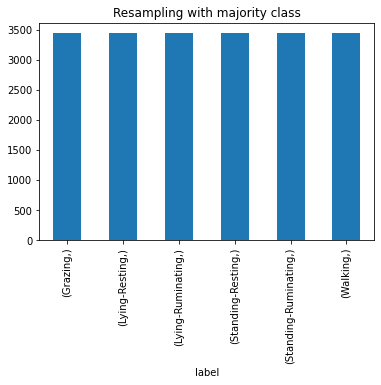

In [ ]:
# SMOTE
_data = data_train.copy()
smote = SMOTE(sampling_strategy='not majority', random_state=seed, k_neighbors=5)
data_balanced_smote, _label_balanced_smote = smote.fit_resample(_data.iloc[:, :-1].values, _data.iloc[:, -1].values)
_shuffle_smote = np.random.RandomState(seed=seed).permutation(len(data_balanced_smote))

data_balanced_smote = pd.DataFrame(data_balanced_smote[_shuffle_smote], columns=data_train.columns[:-1])
_mean = data_balanced_smote.mean()
_std = data_balanced_smote.std()
data_balanced_smote = (data_balanced_smote- _mean) / _std

t_data_train_balanced_smote = data_balanced_smote.values.reshape(data_balanced_smote.shape[0], r_reshape, c_reshape, 1)
label_balanced_smote = np.array(list(map(lambda x: labels_map[x], _label_balanced_smote[_shuffle_smote])))
c_labels_train_balanced_smote = to_categorical(label_balanced_smote)

data_test_smote = data_test.copy()
data_test_smote.iloc[:, :-1] = (data_test_smote.iloc[:, :-1] - _mean) / _std
t_data_test_smote = data_test_smote.iloc[:, :-1].values.reshape(data_test_smote.shape[0], r_reshape, c_reshape, 1)

print(t_data_train_balanced_smote.shape, c_labels_train_balanced_smote.shape, t_data_test_smote.shape, c_labels_test.shape)
_l = pd.DataFrame(_label_balanced_smote, columns=['label'])
print(_l.value_counts())
_l.value_counts().plot(kind='bar', title='Resampling with majority class')

### Visualização dos inputs

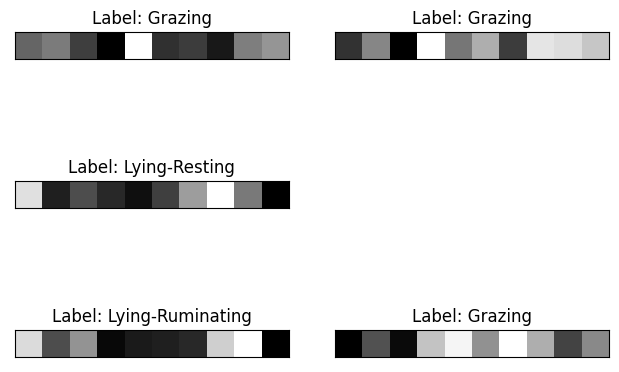

In [ ]:
plt.style.use('default')
fig = plt.figure()
for i in range(6):
  plt.subplot(3, 2, i+1)
  plt.tight_layout()
  plt.imshow(t_data_train[i].reshape(r_reshape, c_reshape), cmap='gray', interpolation='none')
  plt.title("Label: {}".format(list(labels_map.keys())[list(labels_map.values()).index(argmax(c_labels_train[i]))]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Grazing')

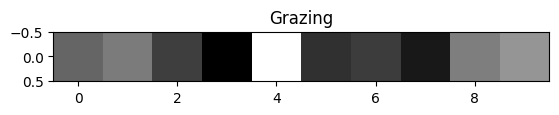

In [ ]:
plt.style.use('default')
plt.imshow(t_data_train[0].reshape(r_reshape, c_reshape), cmap='gray')
plt.title(list(labels_map.keys())[list(labels_map.values()).index(argmax(c_labels_train[0]))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


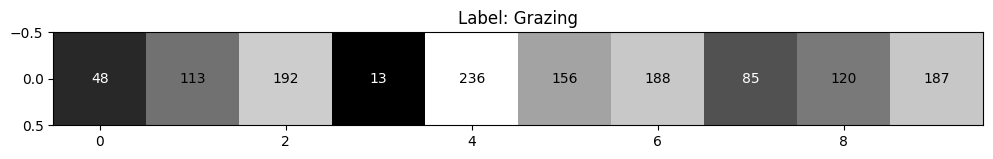

In [ ]:
def visualize_input(window, ax): 
    window = window * 255
    img = np.uint8(window)
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            #ax.annotate(str(round(img[x][y],2)), xy=(y,x),
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
plt.style.use('default')
fig = plt.figure(figsize = (12,12))
plt.title('Label: {}'.format(list(labels_map.keys())[list(labels_map.values()).index(argmax(c_labels_train[0]))]))
ax=fig.add_subplot(111)
visualize_input(t_data_train[0].reshape(r_reshape, c_reshape), ax)

# LeNet-5

In [ ]:
epochs=100
batch_size=64
feature_dimensions=1024
input_shape=(32, 32, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def create_cnn_lenet5():
    model = Sequential([
      Flatten(input_shape=(1, 10 ,1)),
      Dense(feature_dimensions, activation='relu'),
      Reshape(input_shape, input_shape=(feature_dimensions,)),
      Conv2D(6, kernel_size=3, activation='relu'),
      AveragePooling2D(),
      Conv2D(16, kernel_size=3, activation='relu'),
      AveragePooling2D(),
      Flatten(),
      Dense(120, activation='relu',),
      Dense(84, activation='relu', ),
      Dense(6, activation='softmax', )
    ])
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.reset_metrics()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=6, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Pastando          {:.2f}        {:.2f}      {:.2f}
        Deitado-Ruminando {:.2f}        {:.2f}      {:.2f}
        Deitado-Parado    {:.2f}        {:.2f}      {:.2f}
        EmPe-Parado       {:.2f}        {:.2f}      {:.2f}
        Andando           {:.2f}        {:.2f}      {:.2f}
        EmPe-Ruminando    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Pastando']['precision']/n_splits, 100*results['Pastando']['recall']/n_splits, 100*results['Pastando']['f1-score']/n_splits,
        100*results['Deitado-Ruminando']['precision']/n_splits, 100*results['Deitado-Ruminando']['recall']/n_splits, 100*results['Deitado-Ruminando']['f1-score']/n_splits,
        100*results['Deitado-Parado']['precision']/n_splits, 100*results['Deitado-Parado']['recall']/n_splits, 100*results['Deitado-Parado']['f1-score']/n_splits,
        100*results['EmPe-Parado']['precision']/n_splits, 100*results['EmPe-Parado']['recall']/n_splits, 100*results['EmPe-Parado']['f1-score']/n_splits,
        100*results['Andando']['precision']/n_splits, 100*results['Andando']['recall']/n_splits, 100*results['Andando']['f1-score']/n_splits,
        100*results['EmPe-Ruminando']['precision']/n_splits, 100*results['EmPe-Ruminando']['recall']/n_splits, 100*results['EmPe-Ruminando']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn_lenet5().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1024)              11264     
                                                                 
 reshape (Reshape)           (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                        

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn_lenet5()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
123/123 [==============================] - 4s 5ms/step - loss: 1.1872 - acc: 0.5487 - f1_score: 0.2903
Epoch 2/100
123/123 [==============================] - 1s 5ms/step - loss: 0.6869 - acc: 0.7234 - f1_score: 0.5435
Epoch 3/100
123/123 [==============================] - 1s 4ms/step - loss: 0.5974 - acc: 0.7711 - f1_score: 0.6317
Epoch 4/100
123/123 [==============================] - 1s 5ms/step - loss: 0.5668 - acc: 0.7849 - f1_score: 0.6727
Epoch 5/100
123/123 [==============================] - 1s 4ms/step - loss: 0.5278 - acc: 0.7999 - f1_score: 0.7045
Epoch 6/100
123/123 [==============================] - 1s 5ms/step - loss: 0.4922 - acc: 0.8186 - f1_score: 0.7372
Epoch 7/100
123/123 [==============================] - 1s 4ms/step - loss: 0.4640 - acc: 0.8267 - f1_score: 0.7477
Epoch 8/100
123/123 [==============================] - 1s 4ms/step - loss: 0.4423 - acc: 0.8343 - f1_score: 0.7627
Epoch 9/100
123/123 [==============================] - 1s 4ms/step 

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2167,3,23,44,50,6
Lying-Ruminating,5,675,93,34,0,7
Lying-Resting,15,76,545,40,2,3
Standing-Resting,37,17,29,475,2,64
Walking,32,2,0,3,453,1
Standing-Ruminating,8,13,16,85,5,206


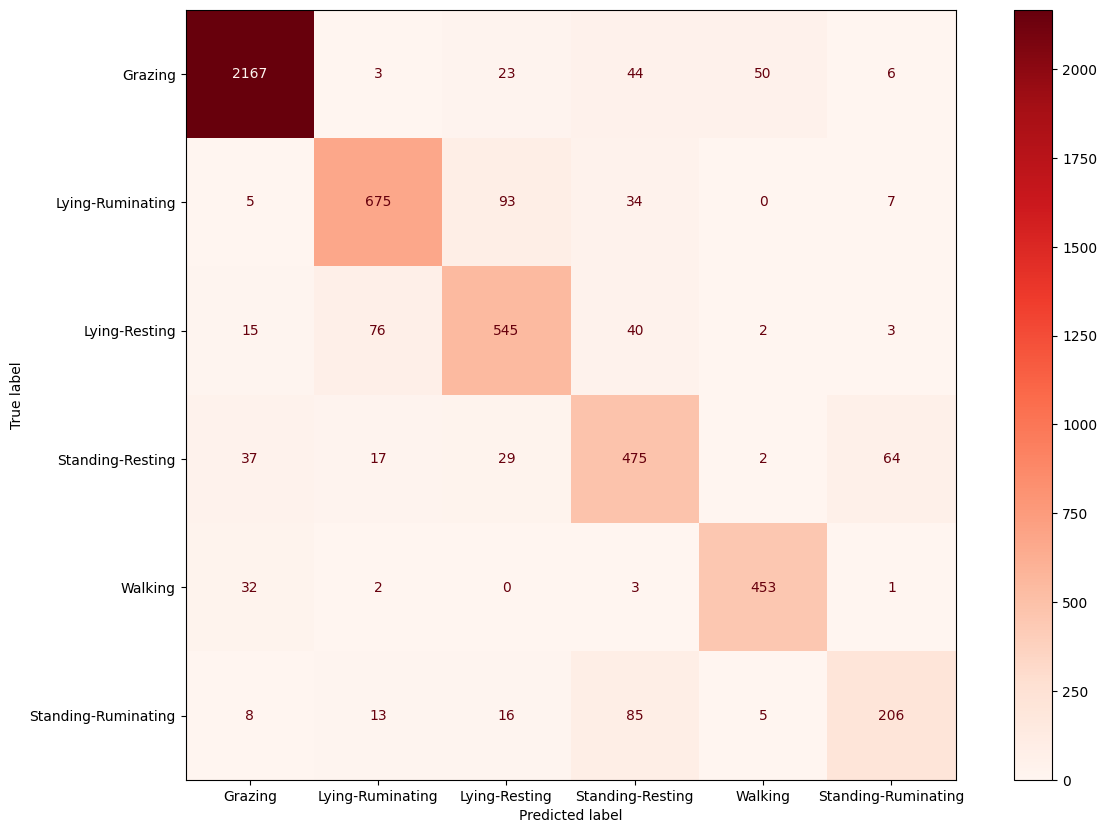

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9572    0.9451    0.9511      2293
   Lying-Ruminating     0.8588    0.8292    0.8438       814
      Lying-Resting     0.7720    0.8003    0.7859       681
   Standing-Resting     0.6975    0.7612    0.7280       624
            Walking     0.8848    0.9226    0.9033       491
Standing-Ruminating     0.7178    0.6186    0.6645       333

           accuracy                         0.8634      5236
          macro avg     0.8147    0.8128    0.8127      5236
       weighted avg     0.8648    0.8634    0.8636      5236



### Gráfico de métricas

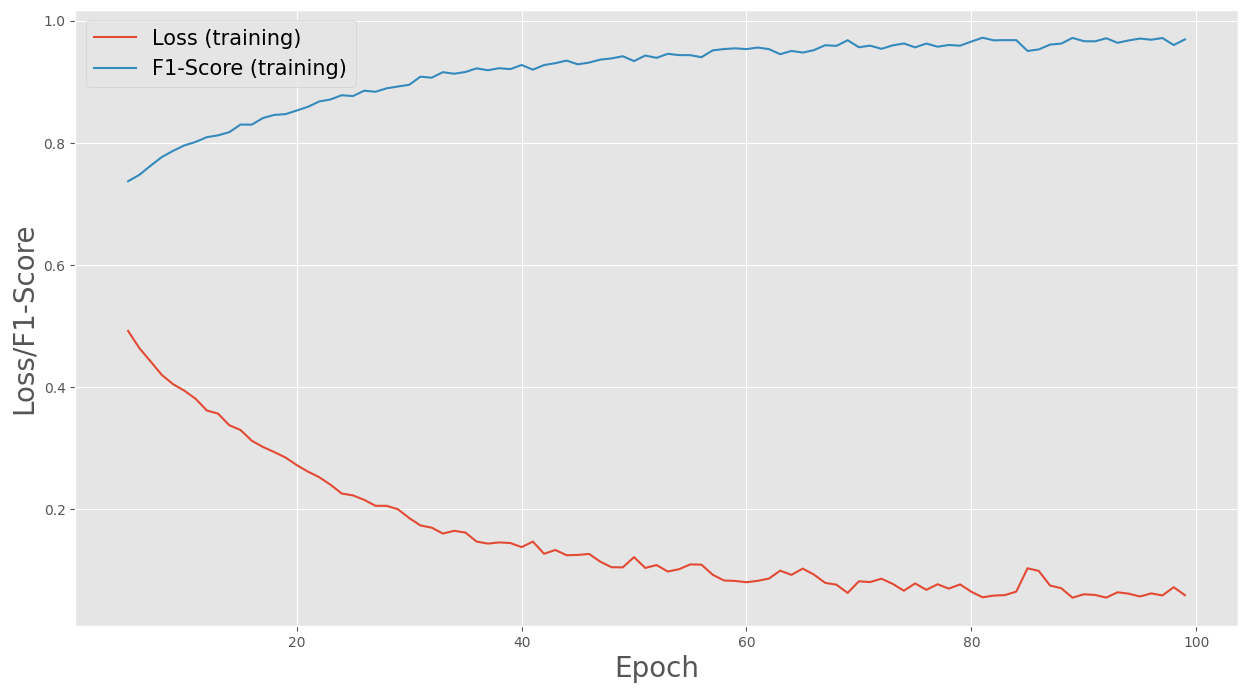

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com Bootstrap

In [ ]:
cnn_model=create_cnn_lenet5()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_bootstrap, c_labels_train_balanced_bootstrap, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_bootstrap, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_bootstrap, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 2s 5ms/step - loss: 0.7144 - acc: 0.7269 - f1_score: 0.5742
Epoch 2/100
323/323 [==============================] - 1s 4ms/step - loss: 0.4643 - acc: 0.8275 - f1_score: 0.6816
Epoch 3/100
323/323 [==============================] - 1s 4ms/step - loss: 0.3901 - acc: 0.8573 - f1_score: 0.7094
Epoch 4/100
323/323 [==============================] - 1s 4ms/step - loss: 0.3141 - acc: 0.8883 - f1_score: 0.7366
Epoch 5/100
323/323 [==============================] - 1s 4ms/step - loss: 0.2478 - acc: 0.9148 - f1_score: 0.7593
Epoch 6/100
323/323 [==============================] - 1s 4ms/step - loss: 0.1949 - acc: 0.9356 - f1_score: 0.7774
Epoch 7/100
323/323 [==============================] - 1s 4ms/step - loss: 0.1587 - acc: 0.9489 - f1_score: 0.7889
Epoch 8/100
323/323 [==============================] - 1s 4ms/step - loss: 0.1195 - acc: 0.9612 - f1_score: 0.7992
Epoch 9/100
323/323 [==============================] - 1s 4ms/step 

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2180,5,0,36,58,14
Lying-Ruminating,9,761,0,29,0,15
Lying-Resting,140,440,0,82,2,17
Standing-Resting,45,29,0,470,3,77
Walking,47,0,0,2,441,1
Standing-Ruminating,8,15,0,78,5,227


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.8975    0.9507    0.9233      2293
   Lying-Ruminating     0.6088    0.9349    0.7374       814
      Lying-Resting     0.0000    0.0000    0.0000       681
   Standing-Resting     0.6743    0.7532    0.7116       624
            Walking     0.8664    0.8982    0.8820       491
Standing-Ruminating     0.6467    0.6817    0.6637       333

           accuracy                         0.7790      5236
          macro avg     0.6156    0.7031    0.6530      5236
       weighted avg     0.6904    0.7790    0.7287      5236



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfico de métricas

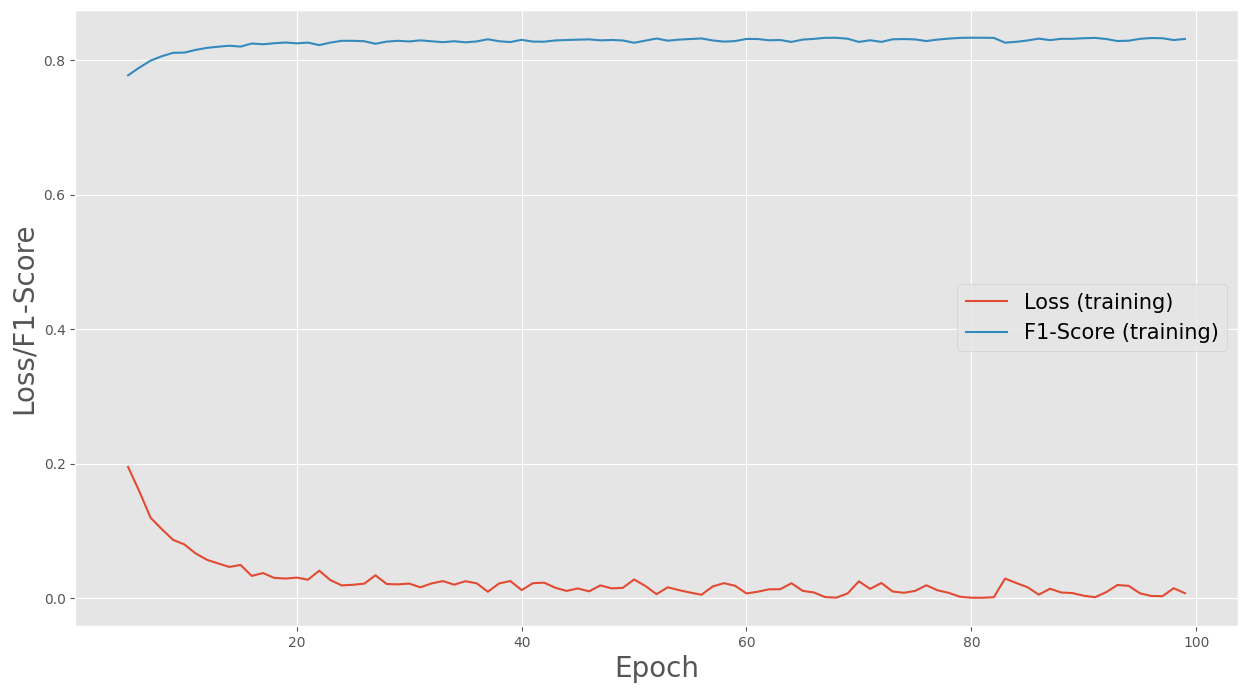

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com SMOTE

In [ ]:
# SMOTE
cnn_model=create_cnn_lenet5()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_smote, c_labels_train_balanced_smote, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_smote, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_smote, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 2s 4ms/step - loss: 0.8817 - acc: 0.6319 - f1_score: 0.6249
Epoch 2/100
323/323 [==============================] - 2s 6ms/step - loss: 0.5949 - acc: 0.7681 - f1_score: 0.7668
Epoch 3/100
323/323 [==============================] - 1s 4ms/step - loss: 0.5235 - acc: 0.7962 - f1_score: 0.7955
Epoch 4/100
323/323 [==============================] - 1s 4ms/step - loss: 0.4679 - acc: 0.8210 - f1_score: 0.8204
Epoch 5/100
323/323 [==============================] - 1s 4ms/step - loss: 0.4331 - acc: 0.8347 - f1_score: 0.8344
Epoch 6/100
323/323 [==============================] - 1s 4ms/step - loss: 0.3991 - acc: 0.8487 - f1_score: 0.8484
Epoch 7/100
323/323 [==============================] - 1s 4ms/step - loss: 0.3634 - acc: 0.8618 - f1_score: 0.8615
Epoch 8/100
323/323 [==============================] - 2s 5ms/step - loss: 0.3335 - acc: 0.8738 - f1_score: 0.8736
Epoch 9/100
323/323 [==============================] - 2s 7ms/step 

### Matrix de confusão

In [ ]:
# matriz de confusao para base balanceada com BOOTSTRAP
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2142,4,24,38,68,17
Lying-Ruminating,4,673,93,32,0,12
Lying-Resting,18,55,559,44,1,4
Standing-Resting,35,15,22,455,1,96
Walking,42,3,1,3,439,3
Standing-Ruminating,9,13,6,75,4,226


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9520    0.9341    0.9430      2293
   Lying-Ruminating     0.8820    0.8268    0.8535       814
      Lying-Resting     0.7929    0.8209    0.8066       681
   Standing-Resting     0.7032    0.7292    0.7160       624
            Walking     0.8558    0.8941    0.8745       491
Standing-Ruminating     0.6313    0.6787    0.6541       333

           accuracy                         0.8583      5236
          macro avg     0.8029    0.8140    0.8080      5236
       weighted avg     0.8614    0.8583    0.8595      5236



### Gráfico de métricas

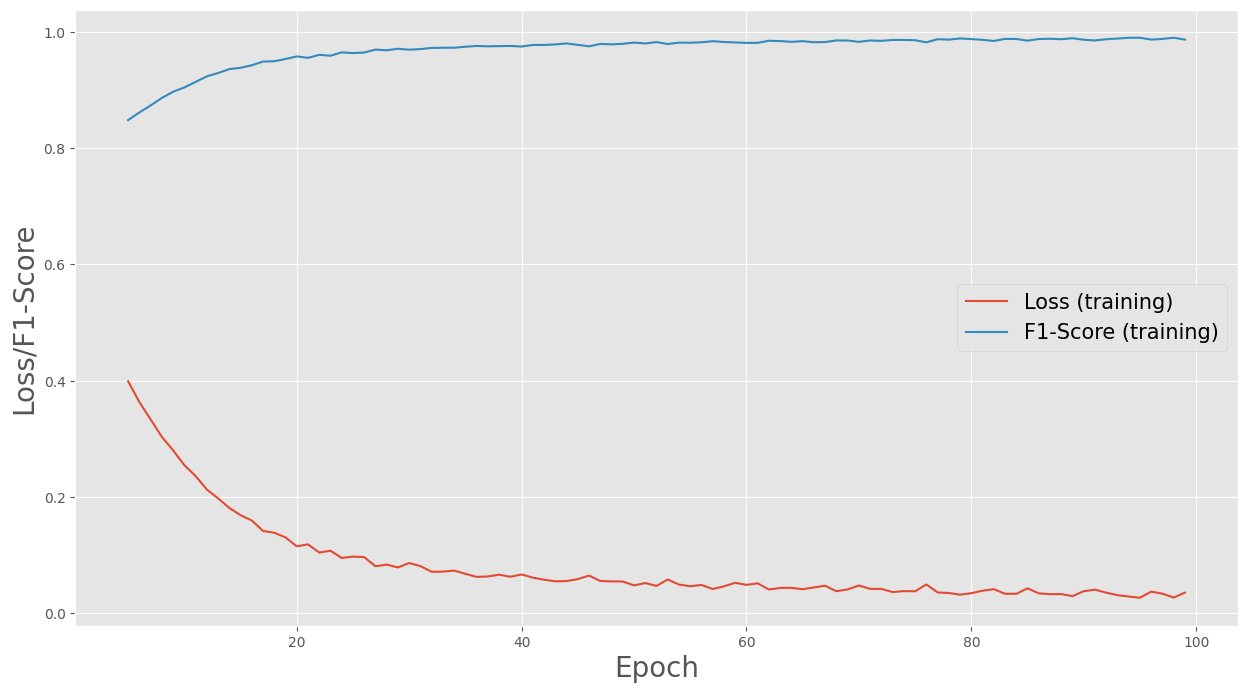

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

# AlexNet

In [ ]:
epochs=100
batch_size=64
feature_dimensions=1024
input_shape=(32, 32, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def create_cnn_alexnet():
    model = Sequential([
            Flatten(input_shape=(1, 10 ,1)),
            Dense(feature_dimensions, activation='relu'),
            Reshape(input_shape, input_shape=(feature_dimensions,)),
            Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', padding="same"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"),
            Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"),
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
            BatchNormalization(),
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
            BatchNormalization(),
            Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"),
            Flatten(),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(4096, activation='relu'),
            Dropout(0.5),
            Dense(6, activation='softmax')
    ])
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.reset_metrics()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=6, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Pastando          {:.2f}        {:.2f}      {:.2f}
        Deitado-Ruminando {:.2f}        {:.2f}      {:.2f}
        Deitado-Parado    {:.2f}        {:.2f}      {:.2f}
        EmPe-Parado       {:.2f}        {:.2f}      {:.2f}
        Andando           {:.2f}        {:.2f}      {:.2f}
        EmPe-Ruminando    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Pastando']['precision']/n_splits, 100*results['Pastando']['recall']/n_splits, 100*results['Pastando']['f1-score']/n_splits,
        100*results['Deitado-Ruminando']['precision']/n_splits, 100*results['Deitado-Ruminando']['recall']/n_splits, 100*results['Deitado-Ruminando']['f1-score']/n_splits,
        100*results['Deitado-Parado']['precision']/n_splits, 100*results['Deitado-Parado']['recall']/n_splits, 100*results['Deitado-Parado']['f1-score']/n_splits,
        100*results['EmPe-Parado']['precision']/n_splits, 100*results['EmPe-Parado']['recall']/n_splits, 100*results['EmPe-Parado']['f1-score']/n_splits,
        100*results['Andando']['precision']/n_splits, 100*results['Andando']['recall']/n_splits, 100*results['Andando']['f1-score']/n_splits,
        100*results['EmPe-Ruminando']['precision']/n_splits, 100*results['EmPe-Ruminando']['recall']/n_splits, 100*results['EmPe-Ruminando']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn_alexnet().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 10)                0         
                                                                 
 dense_16 (Dense)            (None, 1024)              11264     
                                                                 
 reshape_4 (Reshape)         (None, 32, 32, 1)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 96)          11712     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                    

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn_alexnet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
123/123 [==============================] - 4s 22ms/step - loss: 0.9975 - acc: 0.6661 - f1_score: 0.5257
Epoch 2/100
123/123 [==============================] - 2s 20ms/step - loss: 0.6355 - acc: 0.7461 - f1_score: 0.6281
Epoch 3/100
123/123 [==============================] - 2s 20ms/step - loss: 0.5741 - acc: 0.7766 - f1_score: 0.6630
Epoch 4/100
123/123 [==============================] - 2s 19ms/step - loss: 0.5403 - acc: 0.7961 - f1_score: 0.7051
Epoch 5/100
123/123 [==============================] - 3s 24ms/step - loss: 0.5202 - acc: 0.8063 - f1_score: 0.7259
Epoch 6/100
123/123 [==============================] - 2s 20ms/step - loss: 0.4802 - acc: 0.8221 - f1_score: 0.7468
Epoch 7/100
123/123 [==============================] - 2s 20ms/step - loss: 0.4705 - acc: 0.8283 - f1_score: 0.7542
Epoch 8/100
123/123 [==============================] - 2s 15ms/step - loss: 0.4842 - acc: 0.8246 - f1_score: 0.7506
Epoch 9/100
123/123 [==============================] - 2s 1

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2196,6,11,26,44,10
Lying-Ruminating,3,708,68,24,0,11
Lying-Resting,25,129,475,40,1,11
Standing-Resting,46,30,11,455,0,82
Walking,37,0,0,4,450,0
Standing-Ruminating,8,28,2,72,4,219


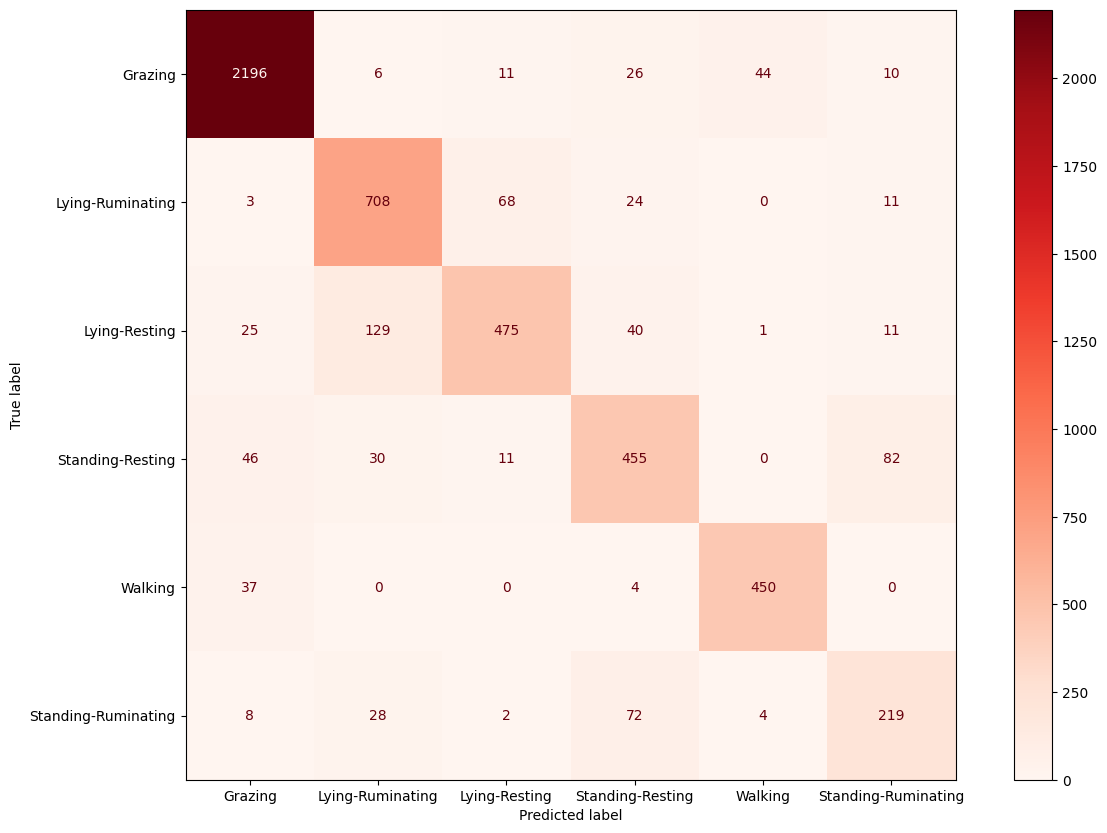

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9486    0.9577    0.9531      2293
   Lying-Ruminating     0.7858    0.8698    0.8257       814
      Lying-Resting     0.8377    0.6975    0.7612       681
   Standing-Resting     0.7327    0.7292    0.7309       624
            Walking     0.9018    0.9165    0.9091       491
Standing-Ruminating     0.6577    0.6577    0.6577       333

           accuracy                         0.8600      5236
          macro avg     0.8107    0.8047    0.8063      5236
       weighted avg     0.8602    0.8600    0.8589      5236



### Gráfico de métricas

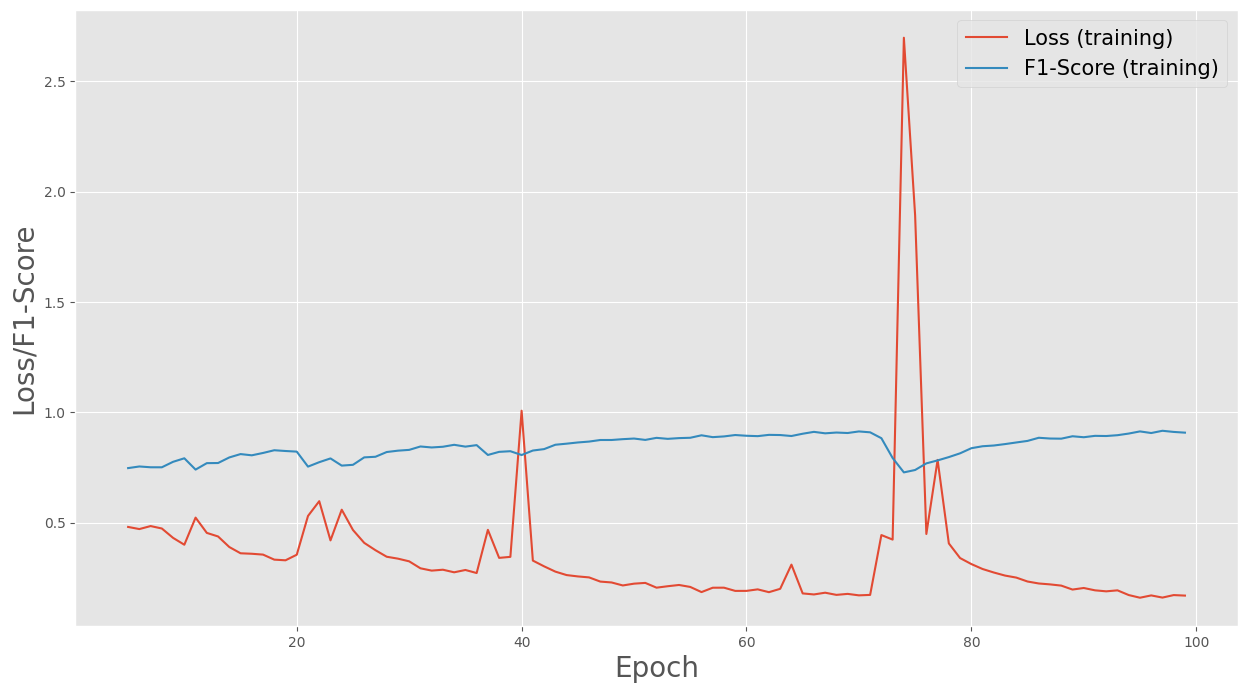

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com Bootstrap

In [ ]:
cnn_model=create_cnn_alexnet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_bootstrap, c_labels_train_balanced_bootstrap, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_bootstrap, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_bootstrap, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 7s 18ms/step - loss: 0.6563 - acc: 0.7831 - f1_score: 0.6421
Epoch 2/100
323/323 [==============================] - 5s 17ms/step - loss: 0.4053 - acc: 0.8711 - f1_score: 0.7211
Epoch 3/100
323/323 [==============================] - 5s 17ms/step - loss: 0.3439 - acc: 0.8924 - f1_score: 0.7400
Epoch 4/100
323/323 [==============================] - 5s 15ms/step - loss: 0.4493 - acc: 0.8731 - f1_score: 0.7232
Epoch 5/100
323/323 [==============================] - 5s 15ms/step - loss: 0.4816 - acc: 0.8587 - f1_score: 0.7117
Epoch 6/100
323/323 [==============================] - 5s 17ms/step - loss: 0.3033 - acc: 0.9020 - f1_score: 0.7487
Epoch 7/100
323/323 [==============================] - 5s 15ms/step - loss: 0.4592 - acc: 0.8916 - f1_score: 0.7397
Epoch 8/100
323/323 [==============================] - 5s 17ms/step - loss: 0.2693 - acc: 0.9236 - f1_score: 0.7676
Epoch 9/100
323/323 [==============================] - 5s 1

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2163,4,0,53,60,13
Lying-Ruminating,3,749,0,53,0,9
Lying-Resting,127,418,0,122,1,13
Standing-Resting,28,18,0,513,2,63
Walking,36,1,0,5,449,0
Standing-Ruminating,8,13,0,100,5,207


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9146    0.9433    0.9287      2293
   Lying-Ruminating     0.6226    0.9201    0.7427       814
      Lying-Resting     0.0000    0.0000    0.0000       681
   Standing-Resting     0.6064    0.8221    0.6980       624
            Walking     0.8685    0.9145    0.8909       491
Standing-Ruminating     0.6787    0.6216    0.6489       333

           accuracy                         0.7794      5236
          macro avg     0.6151    0.7036    0.6515      5236
       weighted avg     0.6942    0.7794    0.7302      5236



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfico de métricas

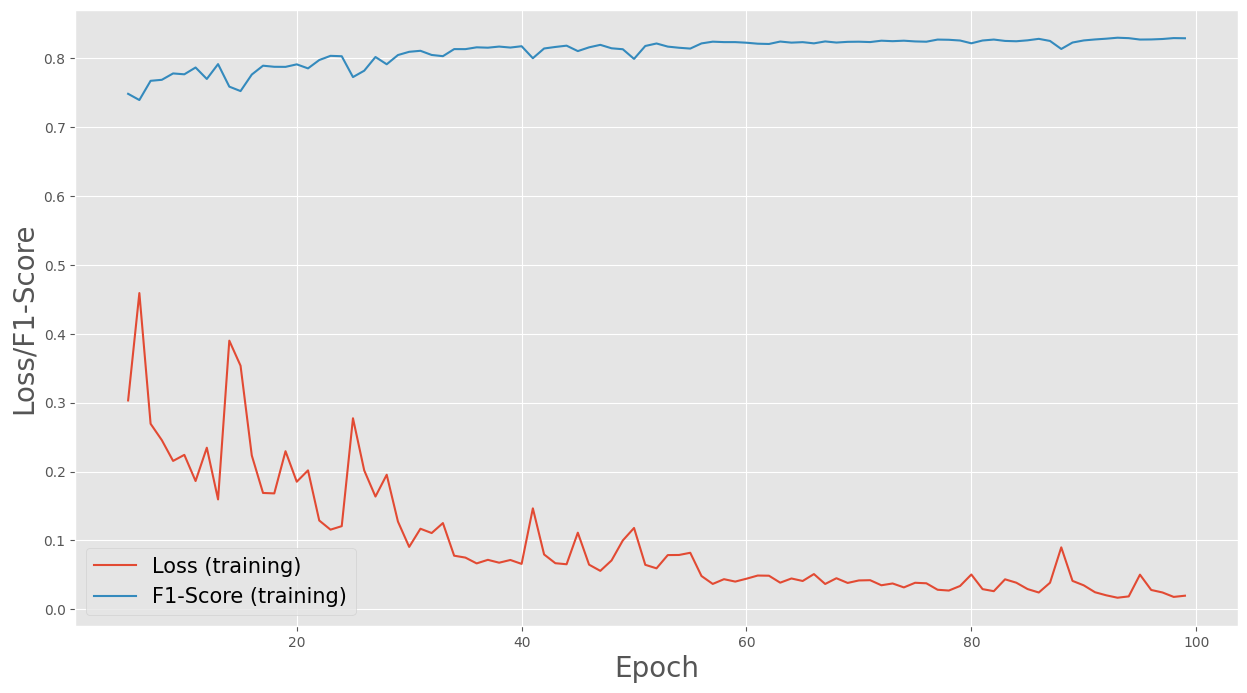

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com SMOTE

In [ ]:
# SMOTE
cnn_model=create_cnn_alexnet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_smote, c_labels_train_balanced_smote, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_smote, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_smote, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 7s 17ms/step - loss: 0.8098 - acc: 0.7110 - f1_score: 0.7097
Epoch 2/100
323/323 [==============================] - 5s 17ms/step - loss: 0.5424 - acc: 0.8032 - f1_score: 0.8024
Epoch 3/100
323/323 [==============================] - 5s 17ms/step - loss: 0.4536 - acc: 0.8382 - f1_score: 0.8376
Epoch 4/100
323/323 [==============================] - 5s 17ms/step - loss: 0.4105 - acc: 0.8579 - f1_score: 0.8575
Epoch 5/100
323/323 [==============================] - 5s 15ms/step - loss: 0.6538 - acc: 0.8061 - f1_score: 0.8053
Epoch 6/100
323/323 [==============================] - 5s 15ms/step - loss: 0.5269 - acc: 0.8316 - f1_score: 0.8309
Epoch 7/100
323/323 [==============================] - 5s 15ms/step - loss: 0.5768 - acc: 0.8257 - f1_score: 0.8250
Epoch 8/100
323/323 [==============================] - 5s 17ms/step - loss: 0.3847 - acc: 0.8675 - f1_score: 0.8673
Epoch 9/100
323/323 [==============================] - 5s 1

### Matrix de confusão

In [ ]:
# matriz de confusao para base balanceada com BOOTSTRAP
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2140,7,26,46,61,13
Lying-Ruminating,23,674,66,40,1,10
Lying-Resting,25,79,519,49,1,8
Standing-Resting,32,25,19,475,2,71
Walking,26,0,1,2,462,0
Standing-Ruminating,7,16,4,97,4,205


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9498    0.9333    0.9415      2293
   Lying-Ruminating     0.8414    0.8280    0.8347       814
      Lying-Resting     0.8173    0.7621    0.7888       681
   Standing-Resting     0.6700    0.7612    0.7127       624
            Walking     0.8701    0.9409    0.9041       491
Standing-Ruminating     0.6678    0.6156    0.6406       333

           accuracy                         0.8547      5236
          macro avg     0.8027    0.8069    0.8037      5236
       weighted avg     0.8570    0.8547    0.8551      5236



### Gráfico de métricas

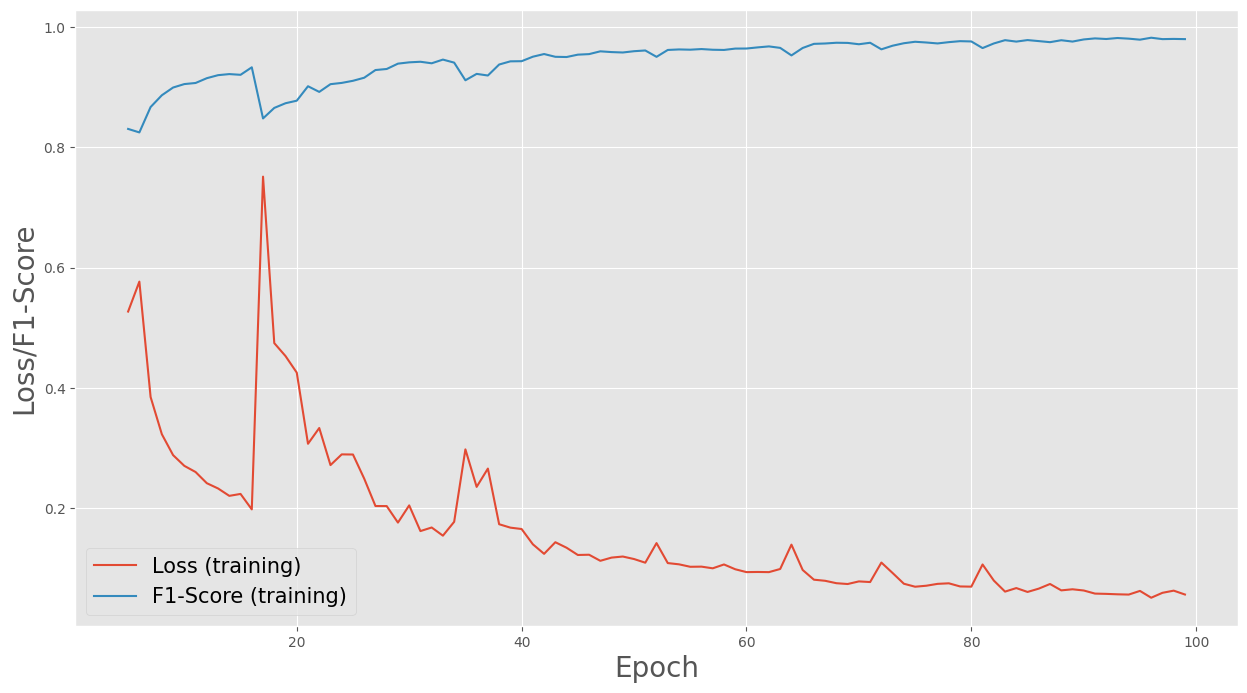

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

# MiniVGG

In [ ]:
epochs=100
batch_size=64
feature_dimensions=1024
input_shape=(32, 32, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def create_cnn_vgg_16():
    model = Sequential([
            Flatten(input_shape=(1, 10 ,1)),
            Dense(feature_dimensions, activation='relu'),
            Reshape(input_shape, input_shape=(feature_dimensions,)),
            Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"),
            Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"),
            MaxPooling2D(pool_size=(2,2),strides=(2,2)),
            Dropout(0.25),
            Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
            Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
            MaxPooling2D(pool_size=(2,2),strides=(2,2)),
            Dropout(0.25),
            Flatten(),
            Dense(units=512,activation="relu"),
            Dropout(0.25),
            Dense(units=6, activation="softmax")
    ])
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.reset_metrics()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=6, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Pastando          {:.2f}        {:.2f}      {:.2f}
        Deitado-Ruminando {:.2f}        {:.2f}      {:.2f}
        Deitado-Parado    {:.2f}        {:.2f}      {:.2f}
        EmPe-Parado       {:.2f}        {:.2f}      {:.2f}
        Andando           {:.2f}        {:.2f}      {:.2f}
        EmPe-Ruminando    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Pastando']['precision']/n_splits, 100*results['Pastando']['recall']/n_splits, 100*results['Pastando']['f1-score']/n_splits,
        100*results['Deitado-Ruminando']['precision']/n_splits, 100*results['Deitado-Ruminando']['recall']/n_splits, 100*results['Deitado-Ruminando']['f1-score']/n_splits,
        100*results['Deitado-Parado']['precision']/n_splits, 100*results['Deitado-Parado']['recall']/n_splits, 100*results['Deitado-Parado']['f1-score']/n_splits,
        100*results['EmPe-Parado']['precision']/n_splits, 100*results['EmPe-Parado']['recall']/n_splits, 100*results['EmPe-Parado']['f1-score']/n_splits,
        100*results['Andando']['precision']/n_splits, 100*results['Andando']['recall']/n_splits, 100*results['Andando']['f1-score']/n_splits,
        100*results['EmPe-Ruminando']['precision']/n_splits, 100*results['EmPe-Ruminando']['recall']/n_splits, 100*results['EmPe-Ruminando']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn_vgg_16().summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 10)                0         
                                                                 
 dense_32 (Dense)            (None, 1024)              11264     
                                                                 
 reshape_8 (Reshape)         (None, 32, 32, 1)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn_vgg_16()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
123/123 [==============================] - 2s 10ms/step - loss: 1.0474 - acc: 0.6051 - f1_score: 0.3851
Epoch 2/100
123/123 [==============================] - 1s 8ms/step - loss: 0.6513 - acc: 0.7374 - f1_score: 0.6098
Epoch 3/100
123/123 [==============================] - 1s 8ms/step - loss: 0.5316 - acc: 0.7946 - f1_score: 0.7080
Epoch 4/100
123/123 [==============================] - 1s 8ms/step - loss: 0.4576 - acc: 0.8241 - f1_score: 0.7525
Epoch 5/100
123/123 [==============================] - 1s 8ms/step - loss: 0.4180 - acc: 0.8363 - f1_score: 0.7708
Epoch 6/100
123/123 [==============================] - 1s 8ms/step - loss: 0.3789 - acc: 0.8553 - f1_score: 0.7967
Epoch 7/100
123/123 [==============================] - 1s 8ms/step - loss: 0.3604 - acc: 0.8575 - f1_score: 0.7977
Epoch 8/100
123/123 [==============================] - 1s 8ms/step - loss: 0.3305 - acc: 0.8695 - f1_score: 0.8144
Epoch 9/100
123/123 [==============================] - 1s 8ms/step

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2171,4,16,34,51,17
Lying-Ruminating,6,710,69,18,0,11
Lying-Resting,16,88,535,35,3,4
Standing-Resting,35,24,22,443,2,98
Walking,45,0,1,1,444,0
Standing-Ruminating,10,18,6,55,4,240


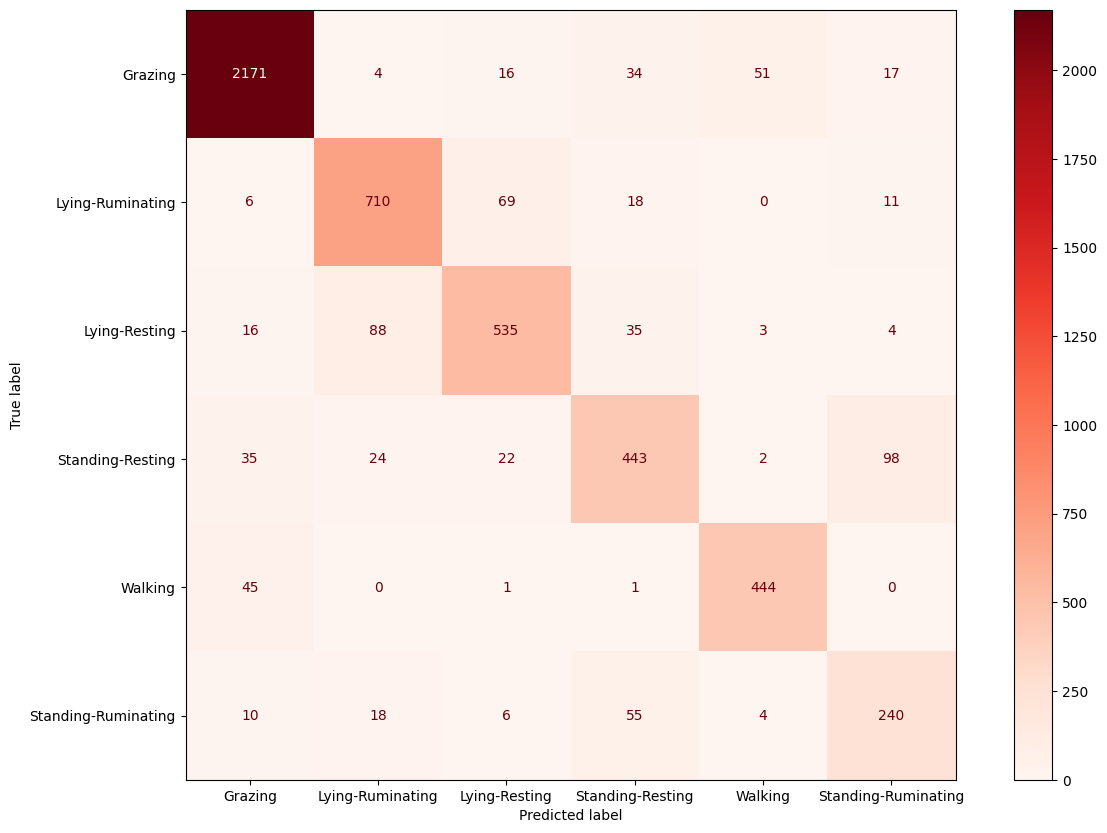

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9509    0.9468    0.9489      2293
   Lying-Ruminating     0.8412    0.8722    0.8565       814
      Lying-Resting     0.8243    0.7856    0.8045       681
   Standing-Resting     0.7560    0.7099    0.7322       624
            Walking     0.8810    0.9043    0.8925       491
Standing-Ruminating     0.6486    0.7207    0.6828       333

           accuracy                         0.8676      5236
          macro avg     0.8170    0.8233    0.8196      5236
       weighted avg     0.8684    0.8676    0.8677      5236



### Gráfico de métricas

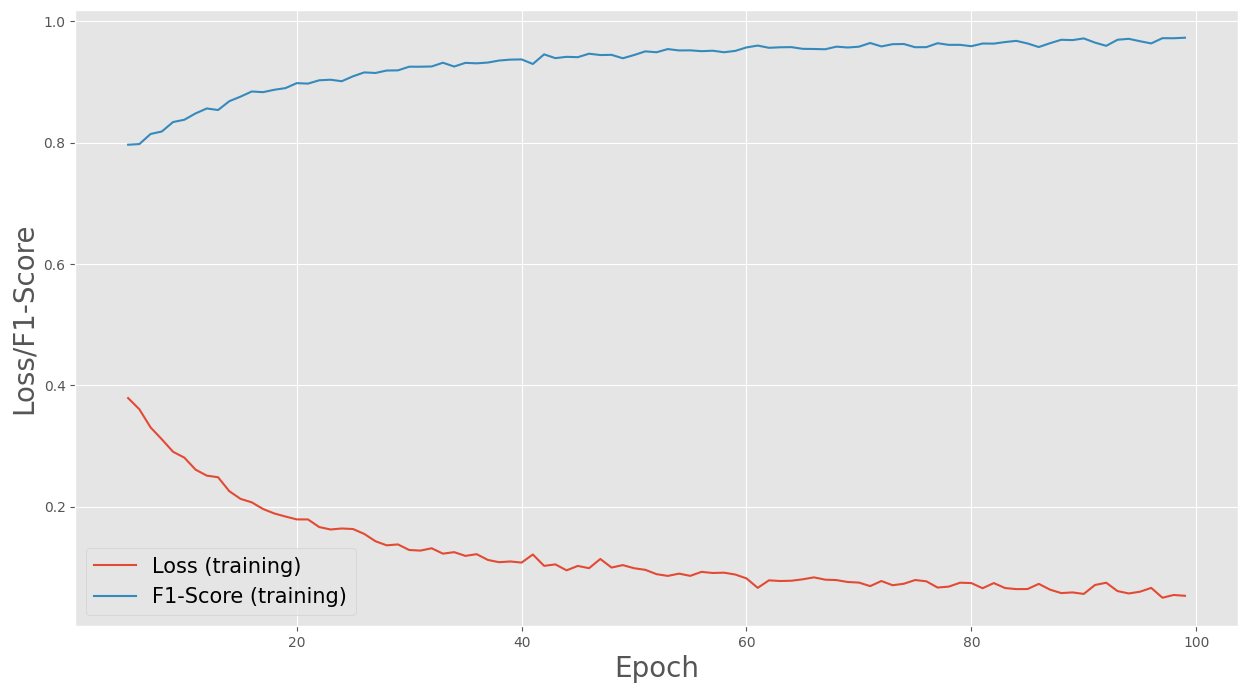

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com Bootstrap

In [ ]:
cnn_model=create_cnn_vgg_16()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_bootstrap, c_labels_train_balanced_bootstrap, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_bootstrap, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_bootstrap, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 3s 8ms/step - loss: 0.6020 - acc: 0.7660 - f1_score: 0.6253
Epoch 2/100
323/323 [==============================] - 2s 7ms/step - loss: 0.3316 - acc: 0.8828 - f1_score: 0.7321
Epoch 3/100
323/323 [==============================] - 2s 7ms/step - loss: 0.2295 - acc: 0.9206 - f1_score: 0.7650
Epoch 4/100
323/323 [==============================] - 2s 7ms/step - loss: 0.1712 - acc: 0.9429 - f1_score: 0.7843
Epoch 5/100
323/323 [==============================] - 2s 7ms/step - loss: 0.1381 - acc: 0.9518 - f1_score: 0.7917
Epoch 6/100
323/323 [==============================] - 2s 7ms/step - loss: 0.1093 - acc: 0.9638 - f1_score: 0.8020
Epoch 7/100
323/323 [==============================] - 2s 7ms/step - loss: 0.0970 - acc: 0.9678 - f1_score: 0.8058
Epoch 8/100
323/323 [==============================] - 2s 7ms/step - loss: 0.0817 - acc: 0.9734 - f1_score: 0.8104
Epoch 9/100
323/323 [==============================] - 2s 7ms/step 

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2204,3,0,23,50,13
Lying-Ruminating,6,764,0,33,0,11
Lying-Resting,138,444,0,82,1,16
Standing-Resting,47,28,0,458,2,89
Walking,40,1,0,2,448,0
Standing-Ruminating,12,9,0,63,4,245


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9007    0.9612    0.9300      2293
   Lying-Ruminating     0.6117    0.9386    0.7407       814
      Lying-Resting     0.0000    0.0000    0.0000       681
   Standing-Resting     0.6929    0.7340    0.7128       624
            Walking     0.8871    0.9124    0.8996       491
Standing-Ruminating     0.6551    0.7357    0.6931       333

           accuracy                         0.7867      5236
          macro avg     0.6246    0.7136    0.6627      5236
       weighted avg     0.6970    0.7867    0.7358      5236



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfico de métricas

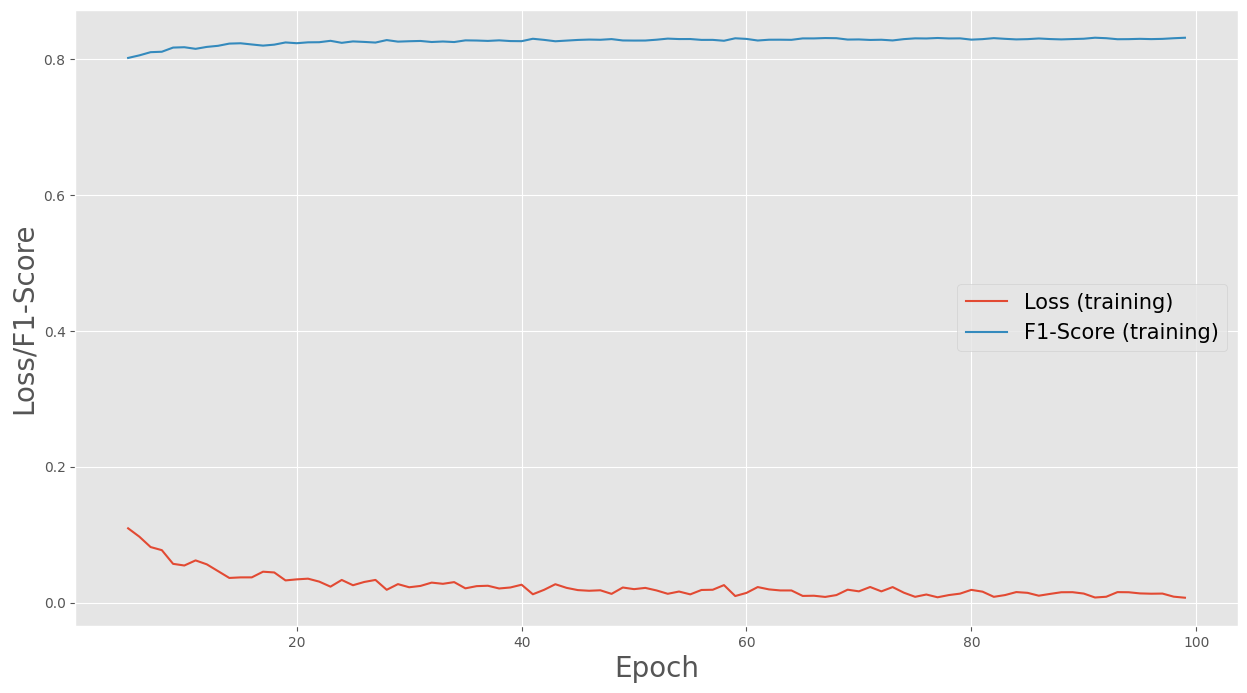

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com SMOTE

In [ ]:
# SMOTE
cnn_model=create_cnn_vgg_16()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_smote, c_labels_train_balanced_smote, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_smote, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_smote, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 3s 7ms/step - loss: 0.7425 - acc: 0.6959 - f1_score: 0.6915
Epoch 2/100
323/323 [==============================] - 2s 7ms/step - loss: 0.4188 - acc: 0.8383 - f1_score: 0.8378
Epoch 3/100
323/323 [==============================] - 2s 7ms/step - loss: 0.3432 - acc: 0.8701 - f1_score: 0.8698
Epoch 4/100
323/323 [==============================] - 2s 7ms/step - loss: 0.2954 - acc: 0.8884 - f1_score: 0.8882
Epoch 5/100
323/323 [==============================] - 2s 7ms/step - loss: 0.2616 - acc: 0.8995 - f1_score: 0.8994
Epoch 6/100
323/323 [==============================] - 2s 7ms/step - loss: 0.2301 - acc: 0.9137 - f1_score: 0.9136
Epoch 7/100
323/323 [==============================] - 2s 7ms/step - loss: 0.2161 - acc: 0.9186 - f1_score: 0.9185
Epoch 8/100
323/323 [==============================] - 2s 7ms/step - loss: 0.1927 - acc: 0.9266 - f1_score: 0.9266
Epoch 9/100
323/323 [==============================] - 2s 7ms/step 

### Matrix de confusão

In [ ]:
# matriz de confusao para base balanceada com BOOTSTRAP
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2153,5,27,41,58,9
Lying-Ruminating,3,701,56,35,0,19
Lying-Resting,16,92,522,44,1,6
Standing-Resting,37,22,20,446,3,96
Walking,35,0,0,1,455,0
Standing-Ruminating,9,13,4,76,4,227


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9556    0.9389    0.9472      2293
   Lying-Ruminating     0.8415    0.8612    0.8512       814
      Lying-Resting     0.8299    0.7665    0.7969       681
   Standing-Resting     0.6936    0.7147    0.7040       624
            Walking     0.8733    0.9267    0.8992       491
Standing-Ruminating     0.6359    0.6817    0.6580       333

           accuracy                         0.8602      5236
          macro avg     0.8050    0.8150    0.8094      5236
       weighted avg     0.8623    0.8602    0.8609      5236



### Gráfico de métricas

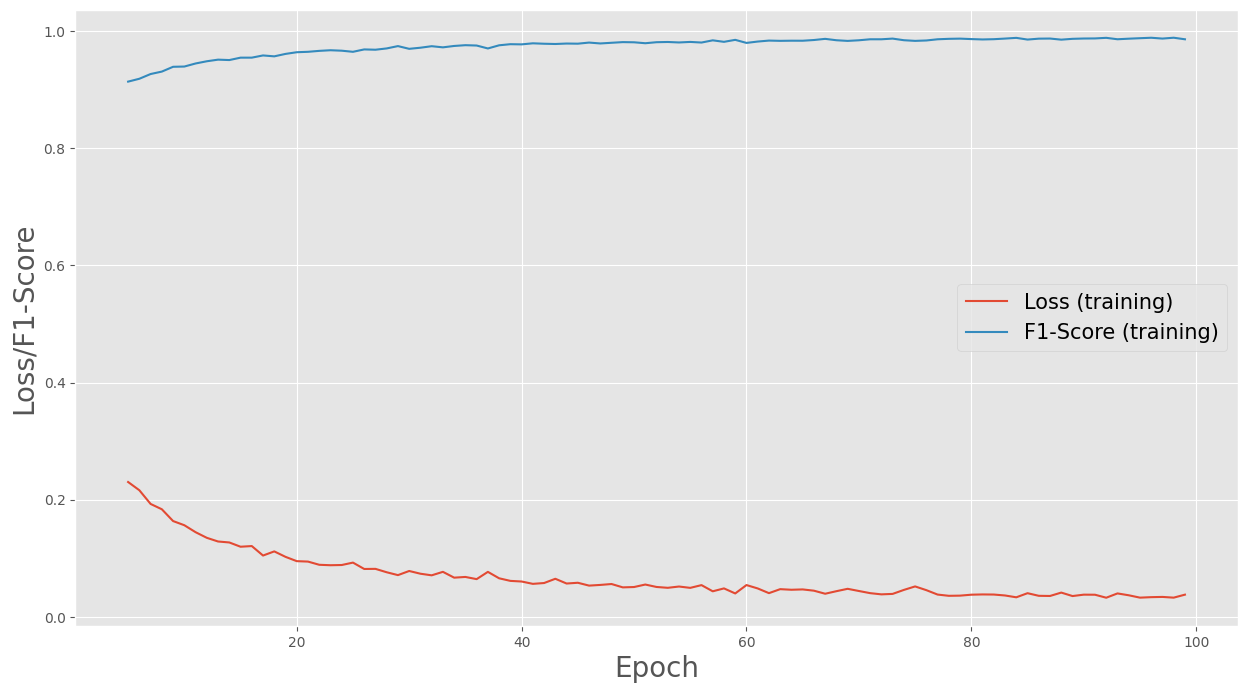

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

# Resnet

In [ ]:
pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=5401a930793ba1f532a58fbb0b0818ff40f2eccd0ba8104be70474f374bced0a
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet


In [ ]:
import keras_resnet.models
epochs=100
batch_size=64
feature_dimensions=1024
input_shape=(32, 32, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def create_cnn_resnet():
    shape, classes = (1, 10, 1), 6
    model = keras_resnet.models.ResNet50(Input(shape), classes=classes)
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.reset_metrics()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=6, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Pastando          {:.2f}        {:.2f}      {:.2f}
        Deitado-Ruminando {:.2f}        {:.2f}      {:.2f}
        Deitado-Parado    {:.2f}        {:.2f}      {:.2f}
        EmPe-Parado       {:.2f}        {:.2f}      {:.2f}
        Andando           {:.2f}        {:.2f}      {:.2f}
        EmPe-Ruminando    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Pastando']['precision']/n_splits, 100*results['Pastando']['recall']/n_splits, 100*results['Pastando']['f1-score']/n_splits,
        100*results['Deitado-Ruminando']['precision']/n_splits, 100*results['Deitado-Ruminando']['recall']/n_splits, 100*results['Deitado-Ruminando']['f1-score']/n_splits,
        100*results['Deitado-Parado']['precision']/n_splits, 100*results['Deitado-Parado']['recall']/n_splits, 100*results['Deitado-Parado']['f1-score']/n_splits,
        100*results['EmPe-Parado']['precision']/n_splits, 100*results['EmPe-Parado']['recall']/n_splits, 100*results['EmPe-Parado']['f1-score']/n_splits,
        100*results['Andando']['precision']/n_splits, 100*results['Andando']['recall']/n_splits, 100*results['Andando']['f1-score']/n_splits,
        100*results['EmPe-Ruminando']['precision']/n_splits, 100*results['EmPe-Ruminando']['recall']/n_splits, 100*results['EmPe-Ruminando']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn_resnet().summary()

Model: "res_net2d50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 10, 1)]   0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 1, 5, 64)     3136        ['input_1[0][0]']                
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 1, 5, 64)     256         ['conv1[0][0]']                  
                                                                                                  
 conv1_relu (Activation)        (None, 1, 5, 64)     0           ['bn_conv1[0][0]']               
                                                                                        

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn_resnet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
123/123 [==============================] - 20s 85ms/step - loss: 1.2758 - acc: 0.6284 - f1_score: 0.5083
Epoch 2/100
123/123 [==============================] - 9s 71ms/step - loss: 0.6764 - acc: 0.7681 - f1_score: 0.6811
Epoch 3/100
123/123 [==============================] - 8s 66ms/step - loss: 0.5498 - acc: 0.8036 - f1_score: 0.7291
Epoch 4/100
123/123 [==============================] - 6s 46ms/step - loss: 0.4760 - acc: 0.8295 - f1_score: 0.7655
Epoch 5/100
123/123 [==============================] - 6s 46ms/step - loss: 0.4754 - acc: 0.8286 - f1_score: 0.7658
Epoch 6/100
123/123 [==============================] - 6s 46ms/step - loss: 0.4293 - acc: 0.8413 - f1_score: 0.7808
Epoch 7/100
123/123 [==============================] - 6s 46ms/step - loss: 0.4004 - acc: 0.8501 - f1_score: 0.7900
Epoch 8/100
123/123 [==============================] - 6s 45ms/step - loss: 0.4074 - acc: 0.8495 - f1_score: 0.7905
Epoch 9/100
123/123 [==============================] - 6s 

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2179,3,24,18,57,12
Lying-Ruminating,3,741,52,10,0,8
Lying-Resting,21,135,501,20,1,3
Standing-Resting,47,34,28,402,2,111
Walking,40,0,1,0,448,2
Standing-Ruminating,10,24,7,54,4,234


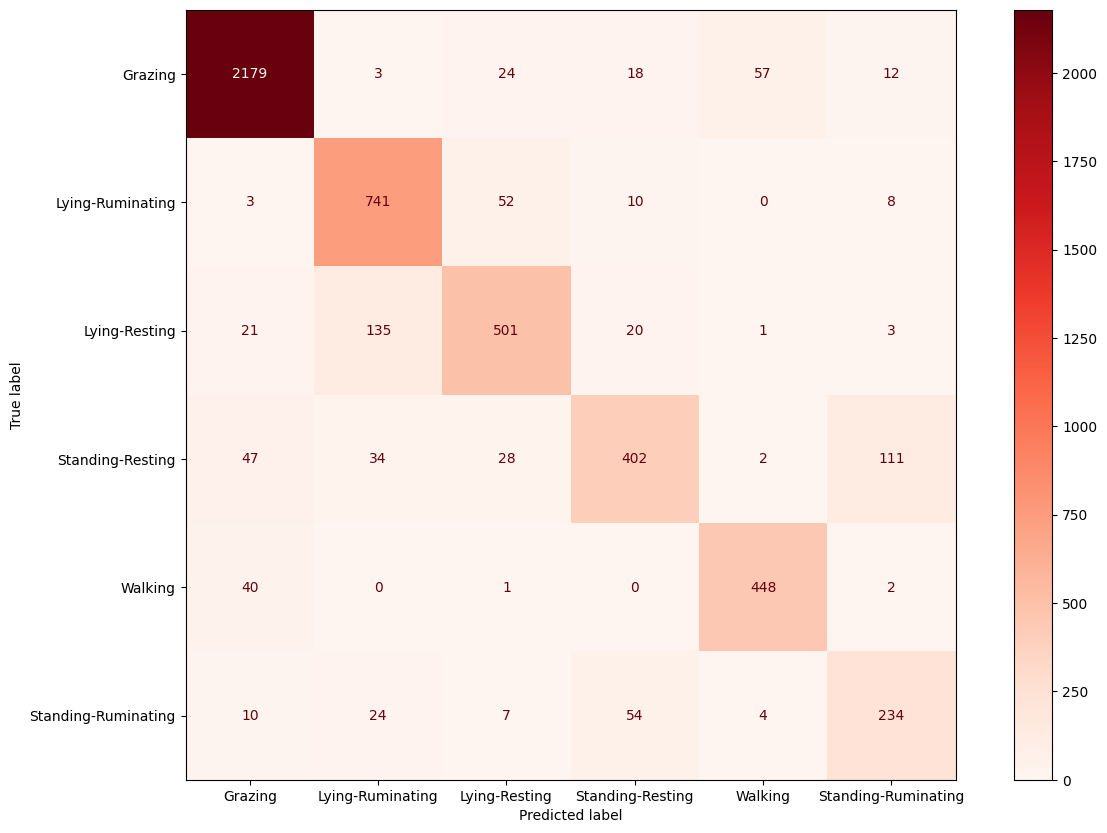

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9474    0.9503    0.9488      2293
   Lying-Ruminating     0.7908    0.9103    0.8464       814
      Lying-Resting     0.8173    0.7357    0.7743       681
   Standing-Resting     0.7976    0.6442    0.7128       624
            Walking     0.8750    0.9124    0.8933       491
Standing-Ruminating     0.6324    0.7027    0.6657       333

           accuracy                         0.8604      5236
          macro avg     0.8101    0.8093    0.8069      5236
       weighted avg     0.8615    0.8604    0.8589      5236



### Gráfico de métricas

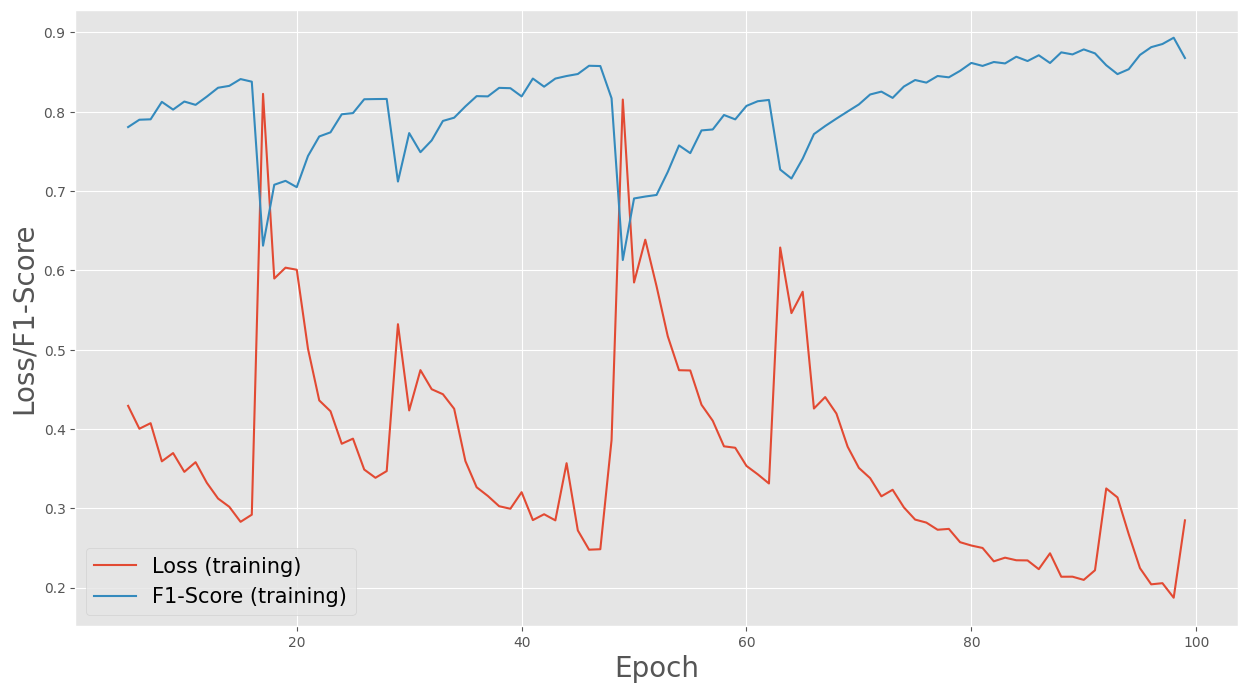

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com Bootstrap

In [ ]:
cnn_model=create_cnn_resnet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_bootstrap, c_labels_train_balanced_bootstrap, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_bootstrap, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_bootstrap, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 19s 44ms/step - loss: 0.7986 - acc: 0.7477 - f1_score: 0.6115
Epoch 2/100
323/323 [==============================] - 13s 40ms/step - loss: 0.3699 - acc: 0.8740 - f1_score: 0.7235
Epoch 3/100
323/323 [==============================] - 13s 41ms/step - loss: 0.2885 - acc: 0.9025 - f1_score: 0.7496
Epoch 4/100
323/323 [==============================] - 12s 36ms/step - loss: 0.4128 - acc: 0.8722 - f1_score: 0.7223
Epoch 5/100
323/323 [==============================] - 12s 36ms/step - loss: 0.5199 - acc: 0.8334 - f1_score: 0.6883
Epoch 6/100
323/323 [==============================] - 12s 36ms/step - loss: 0.3644 - acc: 0.8764 - f1_score: 0.7258
Epoch 7/100
323/323 [==============================] - 12s 36ms/step - loss: 0.3008 - acc: 0.8988 - f1_score: 0.7464
Epoch 8/100
323/323 [==============================] - 13s 40ms/step - loss: 0.2355 - acc: 0.9173 - f1_score: 0.7623
Epoch 9/100
323/323 [==============================

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2179,4,0,28,70,12
Lying-Ruminating,5,768,0,25,1,15
Lying-Resting,133,452,0,71,1,24
Standing-Resting,41,23,0,453,2,105
Walking,21,1,0,3,466,0
Standing-Ruminating,8,10,0,59,4,252


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9129    0.9503    0.9312      2293
   Lying-Ruminating     0.6105    0.9435    0.7413       814
      Lying-Resting     0.0000    0.0000    0.0000       681
   Standing-Resting     0.7089    0.7260    0.7173       624
            Walking     0.8566    0.9491    0.9005       491
Standing-Ruminating     0.6176    0.7568    0.6802       333

           accuracy                         0.7865      5236
          macro avg     0.6178    0.7209    0.6617      5236
       weighted avg     0.6988    0.7865    0.7362      5236



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfico de métricas

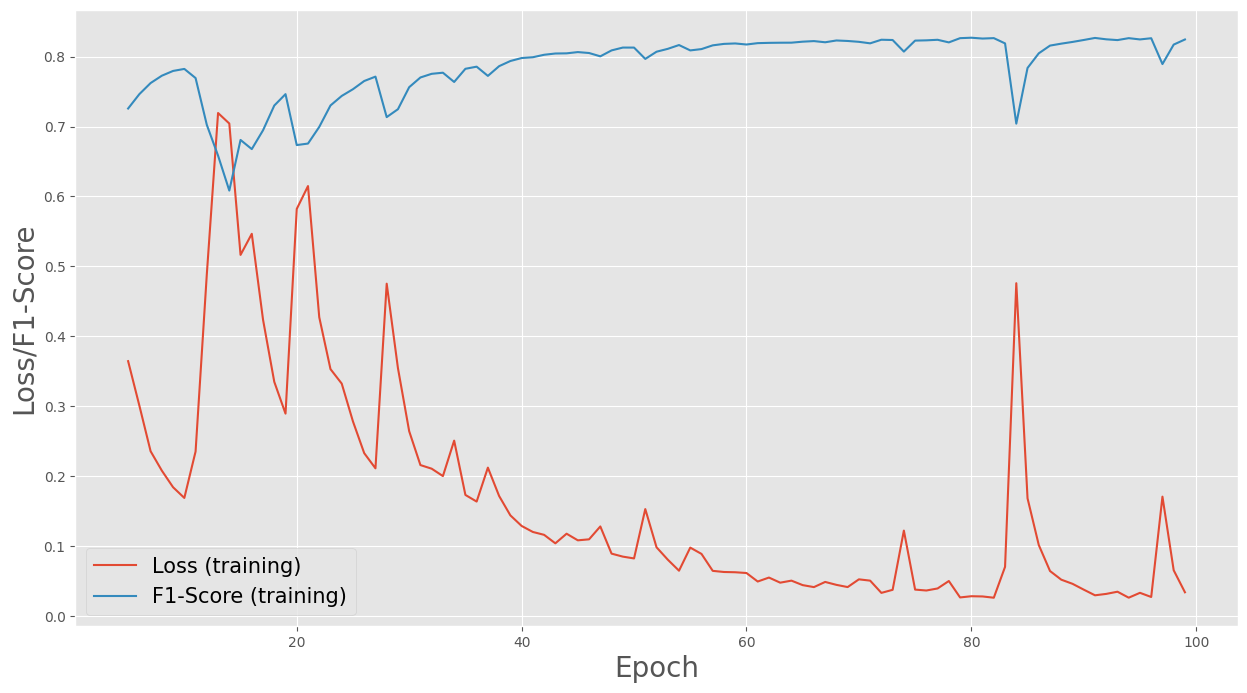

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com SMOTE

In [ ]:
# SMOTE
cnn_model=create_cnn_resnet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_smote, c_labels_train_balanced_smote, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_smote, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_smote, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 18s 40ms/step - loss: 0.9284 - acc: 0.6886 - f1_score: 0.6883
Epoch 2/100
323/323 [==============================] - 13s 40ms/step - loss: 0.5702 - acc: 0.7925 - f1_score: 0.7922
Epoch 3/100
323/323 [==============================] - 13s 40ms/step - loss: 0.4547 - acc: 0.8346 - f1_score: 0.8342
Epoch 4/100
323/323 [==============================] - 12s 36ms/step - loss: 0.6920 - acc: 0.7643 - f1_score: 0.7633
Epoch 5/100
323/323 [==============================] - 12s 36ms/step - loss: 0.5009 - acc: 0.8199 - f1_score: 0.8193
Epoch 6/100
323/323 [==============================] - 13s 40ms/step - loss: 0.4211 - acc: 0.8483 - f1_score: 0.8478
Epoch 7/100
323/323 [==============================] - 12s 36ms/step - loss: 0.4389 - acc: 0.8368 - f1_score: 0.8364
Epoch 8/100
323/323 [==============================] - 12s 36ms/step - loss: 0.4502 - acc: 0.8401 - f1_score: 0.8397
Epoch 9/100
323/323 [==============================

### Matrix de confusão

In [ ]:
# matriz de confusao para base balanceada com BOOTSTRAP
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2139,9,20,33,77,15
Lying-Ruminating,2,716,49,28,1,18
Lying-Resting,20,95,514,43,1,8
Standing-Resting,35,12,15,455,3,104
Walking,25,0,0,2,461,3
Standing-Ruminating,7,8,4,74,5,235


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9601    0.9328    0.9463      2293
   Lying-Ruminating     0.8524    0.8796    0.8658       814
      Lying-Resting     0.8538    0.7548    0.8012       681
   Standing-Resting     0.7165    0.7292    0.7228       624
            Walking     0.8412    0.9389    0.8874       491
Standing-Ruminating     0.6136    0.7057    0.6564       333

           accuracy                         0.8633      5236
          macro avg     0.8063    0.8235    0.8133      5236
       weighted avg     0.8673    0.8633    0.8643      5236



### Gráfico de métricas

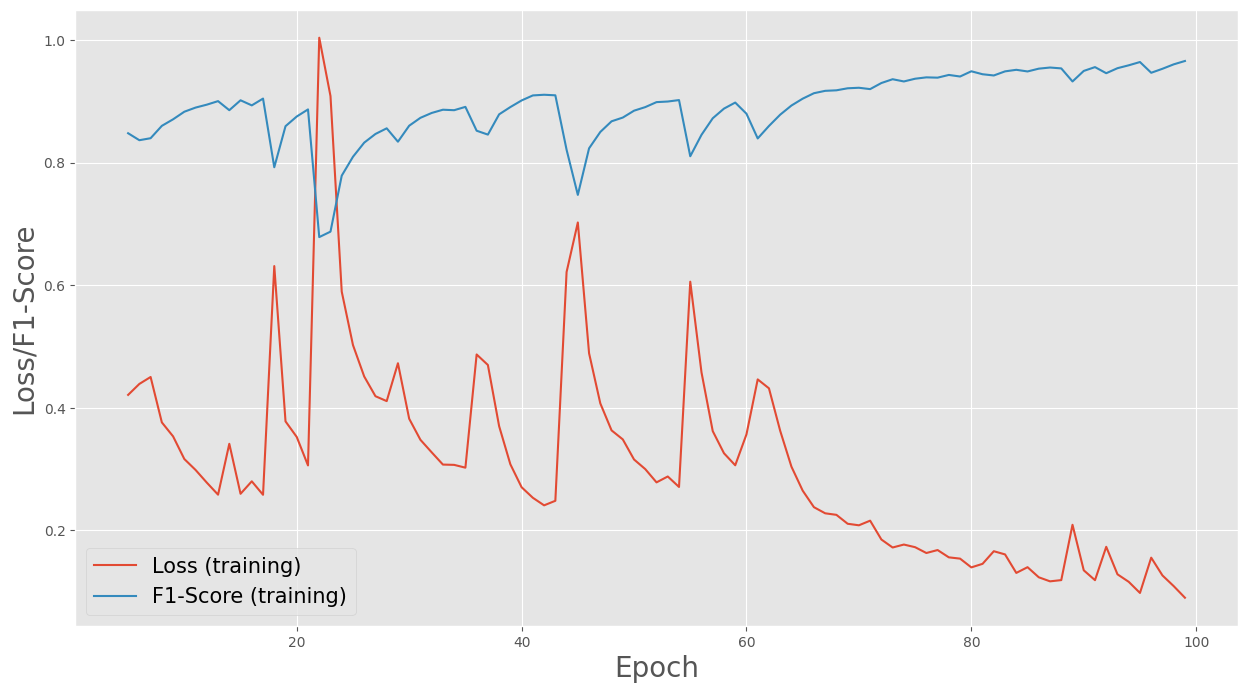

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

# Mobilenet

In [ ]:
epochs=100
batch_size=64
feature_dimensions=1024
input_shape=(32, 32, 1)
n_classes=6
labels_map={"Grazing": 0, "Lying-Ruminating": 1, "Lying-Resting": 2, "Standing-Resting": 3, "Walking": 4, "Standing-Ruminating": 5}

def mobilnet_block (x, filters, strides):
    x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def create_cnn_mobilenet():
    input = Input(shape=(1, 10, 1))
    x = Flatten()(input)
    x = Dense(feature_dimensions, activation='relu')(x)
    x = Reshape(input_shape,)(x)
    x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = mobilnet_block(x, filters = 64, strides = 1)
    x = mobilnet_block(x, filters = 128, strides = 2)
    x = mobilnet_block(x, filters = 128, strides = 1)
    x = mobilnet_block(x, filters = 256, strides = 2)
    x = mobilnet_block(x, filters = 256, strides = 1)
    x = mobilnet_block(x, filters = 512, strides = 2)
    for _ in range (5):
        x = mobilnet_block(x, filters = 512, strides = 1)
    x = mobilnet_block(x, filters = 1024, strides = 2)
    x = mobilnet_block(x, filters = 1024, strides = 1)
    x = AveragePooling2D(pool_size= 7, strides = 1, padding='same')(x)
    x = Flatten()(x)
    output = Dense(units=6, activation='softmax')(x)
    model = Model(inputs=input, outputs=output)
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.reset_metrics()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc', tfa.metrics.F1Score(num_classes=6, name='f1_score', average='macro')])
    return model

def show_classification_report(results, n_splits):
    print('''\t\t        precision      recall     f1-score\n
        Pastando          {:.2f}        {:.2f}      {:.2f}
        Deitado-Ruminando {:.2f}        {:.2f}      {:.2f}
        Deitado-Parado    {:.2f}        {:.2f}      {:.2f}
        EmPe-Parado       {:.2f}        {:.2f}      {:.2f}
        Andando           {:.2f}        {:.2f}      {:.2f}
        EmPe-Ruminando    {:.2f}        {:.2f}      {:.2f}
        macro avg         {:.2f}        {:.2f}      {:.2f}
        accuracy          {:.2f}
    '''.format(
        100*results['Pastando']['precision']/n_splits, 100*results['Pastando']['recall']/n_splits, 100*results['Pastando']['f1-score']/n_splits,
        100*results['Deitado-Ruminando']['precision']/n_splits, 100*results['Deitado-Ruminando']['recall']/n_splits, 100*results['Deitado-Ruminando']['f1-score']/n_splits,
        100*results['Deitado-Parado']['precision']/n_splits, 100*results['Deitado-Parado']['recall']/n_splits, 100*results['Deitado-Parado']['f1-score']/n_splits,
        100*results['EmPe-Parado']['precision']/n_splits, 100*results['EmPe-Parado']['recall']/n_splits, 100*results['EmPe-Parado']['f1-score']/n_splits,
        100*results['Andando']['precision']/n_splits, 100*results['Andando']['recall']/n_splits, 100*results['Andando']['f1-score']/n_splits,
        100*results['EmPe-Ruminando']['precision']/n_splits, 100*results['EmPe-Ruminando']['recall']/n_splits, 100*results['EmPe-Ruminando']['f1-score']/n_splits,
        100*results['macro avg']['precision']/n_splits, 100*results['macro avg']['recall']/n_splits, 100*results['macro avg']['f1-score']/n_splits,
        100*results['accuracy']/n_splits
        )
    )

def update_report(results, new_results):
    for k in new_results.keys():
        if type(new_results[k]) is dict:
            for _k in results[k].keys():
                results[k][_k]+=new_results[k][_k]
        else:
            results[k] += new_results[k]
create_cnn_mobilenet().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 10, 1)]        0         
                                                                 
 flatten_24 (Flatten)        (None, 10)                0         
                                                                 
 dense_44 (Dense)            (None, 1024)              11264     
                                                                 
 reshape_12 (Reshape)        (None, 32, 32, 1)         0         
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 32)        320       
                                                                 
 batch_normalization_20 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                             

## Base original

In [ ]:
# ORIGINAL
cnn_model=create_cnn_mobilenet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train, c_labels_train, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
123/123 [==============================] - 6s 23ms/step - loss: 0.9180 - acc: 0.6701 - f1_score: 0.5572
Epoch 2/100
123/123 [==============================] - 2s 18ms/step - loss: 0.5205 - acc: 0.8190 - f1_score: 0.7519
Epoch 3/100
123/123 [==============================] - 2s 18ms/step - loss: 0.4639 - acc: 0.8414 - f1_score: 0.7811
Epoch 4/100
123/123 [==============================] - 2s 18ms/step - loss: 0.4132 - acc: 0.8558 - f1_score: 0.8013
Epoch 5/100
123/123 [==============================] - 2s 18ms/step - loss: 0.3871 - acc: 0.8604 - f1_score: 0.8077
Epoch 6/100
123/123 [==============================] - 2s 18ms/step - loss: 0.3634 - acc: 0.8721 - f1_score: 0.8215
Epoch 7/100
123/123 [==============================] - 2s 15ms/step - loss: 0.3504 - acc: 0.8667 - f1_score: 0.8119
Epoch 8/100
123/123 [==============================] - 2s 15ms/step - loss: 0.3464 - acc: 0.8718 - f1_score: 0.8209
Epoch 9/100
123/123 [==============================] - 2s 1

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2165,6,12,57,45,8
Lying-Ruminating,3,732,45,29,0,5
Lying-Resting,21,154,463,40,1,2
Standing-Resting,38,37,12,454,2,81
Walking,54,0,1,0,435,1
Standing-Ruminating,9,24,4,90,6,200


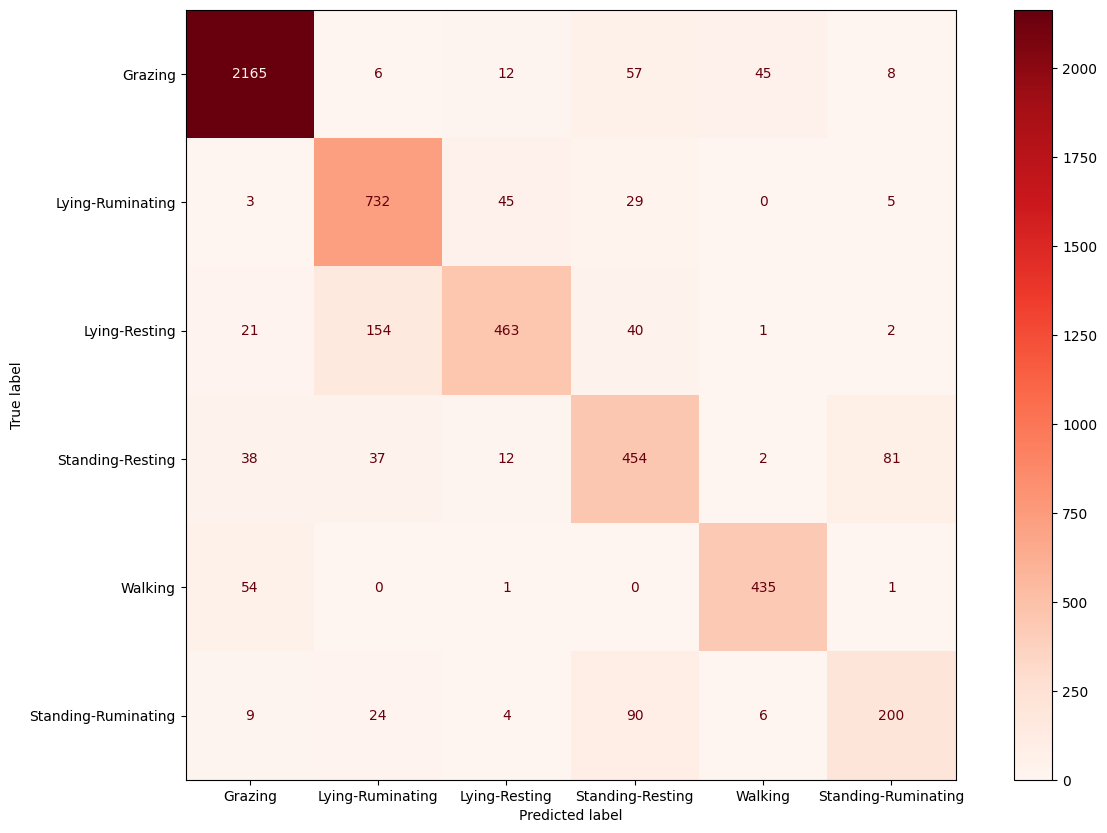

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map)
disp.plot(ax=ax, cmap="Reds", values_format='')

### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9454    0.9442    0.9448      2293
   Lying-Ruminating     0.7681    0.8993    0.8285       814
      Lying-Resting     0.8622    0.6799    0.7603       681
   Standing-Resting     0.6776    0.7276    0.7017       624
            Walking     0.8896    0.8859    0.8878       491
Standing-Ruminating     0.6734    0.6006    0.6349       333

           accuracy                         0.8497      5236
          macro avg     0.8027    0.7896    0.7930      5236
       weighted avg     0.8526    0.8497    0.8487      5236



### Gráfico de métricas

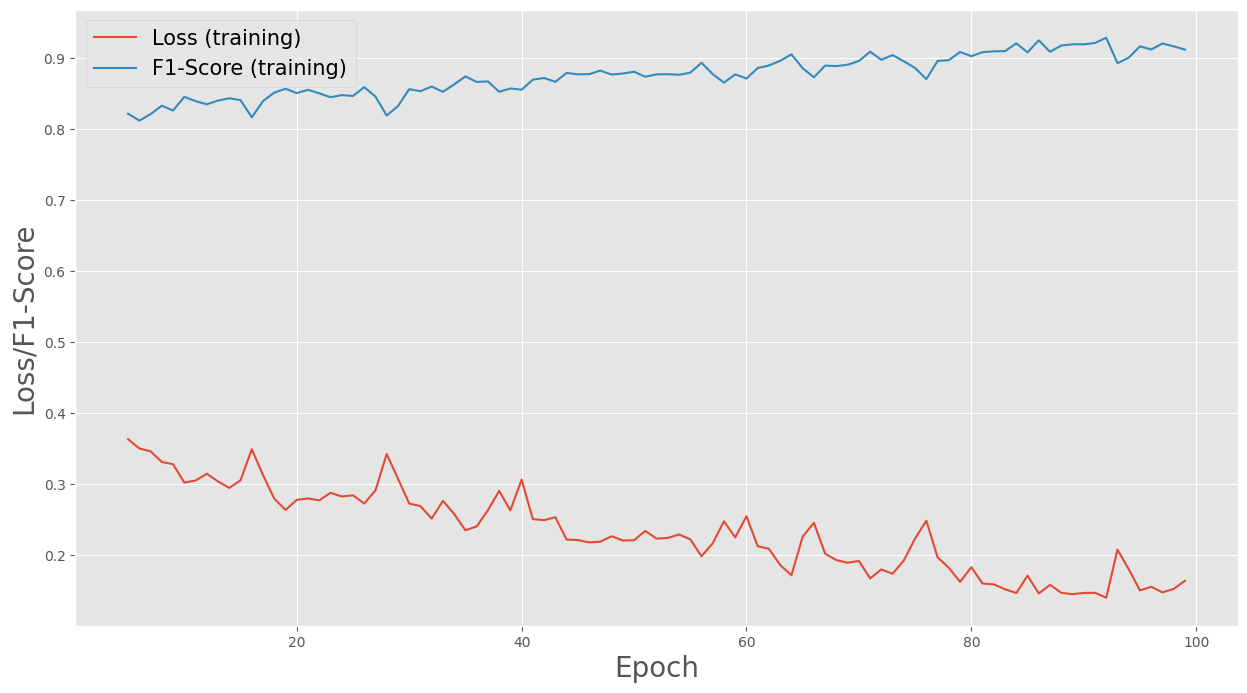

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com Bootstrap

In [ ]:
cnn_model=create_cnn_mobilenet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_bootstrap, c_labels_train_balanced_bootstrap, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_bootstrap, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_bootstrap, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 9s 17ms/step - loss: 0.4933 - acc: 0.8353 - f1_score: 0.6883
Epoch 2/100
323/323 [==============================] - 5s 16ms/step - loss: 0.2450 - acc: 0.9224 - f1_score: 0.7655
Epoch 3/100
323/323 [==============================] - 5s 16ms/step - loss: 0.2036 - acc: 0.9323 - f1_score: 0.7753
Epoch 4/100
323/323 [==============================] - 5s 16ms/step - loss: 0.1837 - acc: 0.9397 - f1_score: 0.7812
Epoch 5/100
323/323 [==============================] - 5s 16ms/step - loss: 0.1777 - acc: 0.9424 - f1_score: 0.7838
Epoch 6/100
323/323 [==============================] - 5s 16ms/step - loss: 0.1739 - acc: 0.9429 - f1_score: 0.7846
Epoch 7/100
323/323 [==============================] - 5s 16ms/step - loss: 0.1662 - acc: 0.9456 - f1_score: 0.7867
Epoch 8/100
323/323 [==============================] - 5s 16ms/step - loss: 0.1667 - acc: 0.9459 - f1_score: 0.7873
Epoch 9/100
323/323 [==============================] - 5s 1

### Matrix de confusão

In [ ]:
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2166,9,0,39,65,14
Lying-Ruminating,7,762,0,36,0,9
Lying-Resting,138,449,0,80,1,13
Standing-Resting,41,27,0,478,1,77
Walking,36,2,0,4,447,2
Standing-Ruminating,15,12,0,72,4,230


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9014    0.9446    0.9225      2293
   Lying-Ruminating     0.6043    0.9361    0.7345       814
      Lying-Resting     0.0000    0.0000    0.0000       681
   Standing-Resting     0.6742    0.7660    0.7172       624
            Walking     0.8629    0.9104    0.8860       491
Standing-Ruminating     0.6667    0.6907    0.6785       333

           accuracy                         0.7798      5236
          macro avg     0.6182    0.7080    0.6564      5236
       weighted avg     0.6923    0.7798    0.7299      5236



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfico de métricas

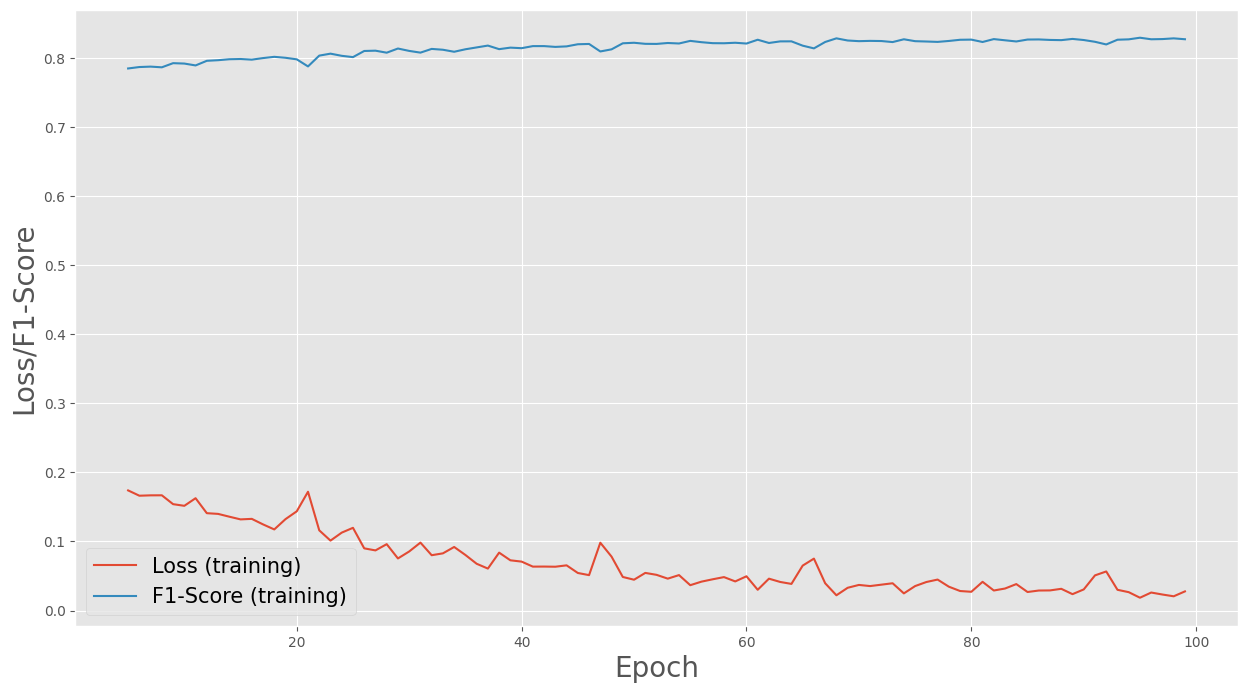

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()

## Base com SMOTE

In [ ]:
# SMOTE
cnn_model=create_cnn_mobilenet()
print('Training ...')
cb = ModelCheckpoint('.best_model_holdout.hdf5', save_best_only=True, monitor='f1_score', mode='max')
hist=cnn_model.fit(t_data_train_balanced_smote, c_labels_train_balanced_smote, epochs=epochs, verbose=1,
                batch_size=batch_size, shuffle=True,
                callbacks=[cb]
                )
cnn_model.load_weights('.best_model_holdout.hdf5')
scores=cnn_model.evaluate(t_data_test_smote, c_labels_test, verbose=1)
predictions=cnn_model.predict(t_data_test_smote, verbose=1)
cm=confusion_matrix(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0, 1, 2, 3, 4, 5])
print(f'Score: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')

Training ...
Epoch 1/100
323/323 [==============================] - 8s 16ms/step - loss: 0.6803 - acc: 0.7521 - f1_score: 0.7517
Epoch 2/100
323/323 [==============================] - 5s 16ms/step - loss: 0.4041 - acc: 0.8574 - f1_score: 0.8571
Epoch 3/100
323/323 [==============================] - 5s 16ms/step - loss: 0.3492 - acc: 0.8754 - f1_score: 0.8750
Epoch 4/100
323/323 [==============================] - 5s 16ms/step - loss: 0.3341 - acc: 0.8798 - f1_score: 0.8796
Epoch 5/100
323/323 [==============================] - 5s 16ms/step - loss: 0.3323 - acc: 0.8808 - f1_score: 0.8806
Epoch 6/100
323/323 [==============================] - 5s 16ms/step - loss: 0.3126 - acc: 0.8880 - f1_score: 0.8879
Epoch 7/100
323/323 [==============================] - 5s 16ms/step - loss: 0.3073 - acc: 0.8909 - f1_score: 0.8907
Epoch 8/100
323/323 [==============================] - 5s 14ms/step - loss: 0.3019 - acc: 0.8892 - f1_score: 0.8891
Epoch 9/100
323/323 [==============================] - 5s 1

### Matrix de confusão

In [ ]:
# matriz de confusao para base balanceada com BOOTSTRAP
pd.DataFrame(cm, index=labels_map, columns=labels_map)

,Grazing,Lying-Ruminating,Lying-Resting,Standing-Resting,Walking,Standing-Ruminating
Grazing,2181,3,19,25,47,18
Lying-Ruminating,6,689,79,30,1,9
Lying-Resting,19,68,539,49,1,5
Standing-Resting,44,25,13,452,2,88
Walking,46,0,0,3,441,1
Standing-Ruminating,11,16,3,90,4,209


### Métricas

In [ ]:
print(classification_report(c_labels_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labels_map, output_dict=False, digits=4))

                     precision    recall  f1-score   support

            Grazing     0.9454    0.9512    0.9483      2293
   Lying-Ruminating     0.8602    0.8464    0.8533       814
      Lying-Resting     0.8254    0.7915    0.8081       681
   Standing-Resting     0.6965    0.7244    0.7101       624
            Walking     0.8891    0.8982    0.8936       491
Standing-Ruminating     0.6333    0.6276    0.6305       333

           accuracy                         0.8615      5236
          macro avg     0.8083    0.8065    0.8073      5236
       weighted avg     0.8617    0.8615    0.8615      5236



### Gráfico de métricas

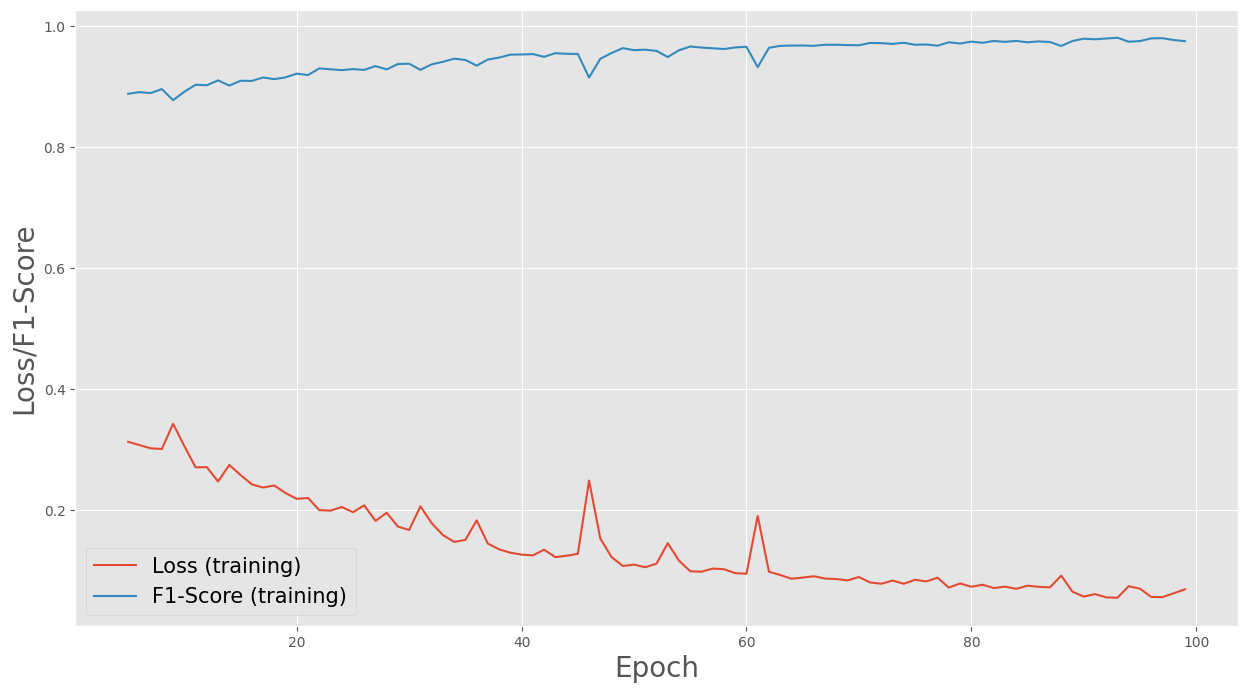

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
plt.plot(np.arange(0, epochs)[5:], hist.history["loss"][5:], label="Loss (training)")
plt.plot(np.arange(0, epochs)[5:], hist.history["f1_score"][5:], label="F1-Score (training)")
plt.xlabel("Epoch", size=20)
plt.ylabel("Loss/F1-Score", size=20)
plt.legend(prop={"size":15})
plt.show()